<a href="https://colab.research.google.com/github/MatSchualtz/Meus_Projetos/blob/main/Mini_Projeto_Kc_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUÇÃO

Este projeto se trata de uma análise de investimento de imóveis, utilizando o Dataframe Kc_House, disponível no Kaggle. Para que os resultados fossem os mais relevantes possívels, foi utilizado a metodologia do CRISP-DM, para que fosse possível entender o problema de negócio, e os dados disponíveis para resolução dos mesmos.

---

A resposta final consiste em encontrar 5 imóveis que merecem investimento e os motivos, e 5 imóveis que não merecem investimento e os motivos.




# Etapa 1 - Instalação, Importação e Leitura

In [47]:
#Instalação de bibliotecas

!pip install sidetable
!pip install geopy
!pip install pyzipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#Importação de bibliotecas 

import numpy as np
import pandas as pd

import sidetable
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from pyzipcode import ZipCodeDatabase
from geopy.geocoders import Nominatim

**Funções**

In [86]:
#função que converte ft2 para m2

def ft2_to_m2(valor):
    return valor * 0.092903



**Configurações de plots**

In [50]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (40,20),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

In [51]:
#Leitura DF

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Mini Projeto 1/kc_house_data.csv')

In [52]:
#renomeando colunas

df = df.rename(columns={'date':'Data','price':'Preço','bedrooms':'Quartos','bathrooms':'Banheiros','sqft_living':'Area_Construída',
                        'sqft_lot':'Area_Terreno','floors':'Andares','waterfront':'Beira_Mar','view':'Beleza_Vista','condition':'Condicao',
                        'grade':'Qualidade_Material','sqft_above':'Area_solo','sqft_basement':'Area_subsolo','yr_built':'Idade_Imovel','yr_renovated':'Ano_Restauração',
                        'zipcode':'CEP','lat':'Latitude','long':'Longitude','sqft_living15':'Media_Area_Construida_15_Imoveis_Vizinhos','sqft_lot15':'Media_Area_Terreno_15_Imoveis_Vizinhos'})

# Etapa 2 - Entendendo e Tratando os Dados


In [53]:
#compreendendo DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         21613 non-null  int64  
 1   Data                                       21613 non-null  object 
 2   Preço                                      21613 non-null  float64
 3   Quartos                                    21613 non-null  int64  
 4   Banheiros                                  21613 non-null  float64
 5   Area_Construída                            21613 non-null  int64  
 6   Area_Terreno                               21613 non-null  int64  
 7   Andares                                    21613 non-null  float64
 8   Beira_Mar                                  21613 non-null  int64  
 9   Beleza_Vista                               21613 non-null  int64  
 10  Condicao              

In [54]:
#verificando dados duplicados
df.duplicated().sum()

0

In [55]:
df.describe()

,id,Preço,Quartos,Banheiros,Area_Construída,Area_Terreno,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,Area_solo,Area_subsolo,Idade_Imovel,Ano_Restauração,CEP,Latitude,Longitude,Media_Area_Construida_15_Imoveis_Vizinhos,Media_Area_Terreno_15_Imoveis_Vizinhos
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
#interando cidades

cidades = []
zcdb = ZipCodeDatabase()

for c in df['CEP']:
  try:
    zipcode = zcdb[c]
    cidades.append(zipcode.city)
  except KeyError:
    cidades.append(float('nan'))





In [57]:
#Inserindo a coluna cidades ao DF

df['Cidades'] = cidades


In [58]:
#Verificando os valores unicos

df['Cidades'].unique()

array(['Seattle', 'Kenmore', 'Sammamish', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Mercer Island',
       'Kent', 'Issaquah', 'Renton', 'Vashon', 'Kirkland',
       'Black Diamond', 'North Bend', nan, 'Snoqualmie', 'Enumclaw',
       'Fall City', 'Bothell', 'Woodinville', 'Carnation', 'Medina'],
      dtype=object)

In [59]:
#salvando novo DF tratado

df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Mini Projeto 1/kc_house_data_tratado.csv')

# Etapa 3 - Desenvolvendo novos parametros e tratando novamente os dados


In [60]:
#lendo dados tratados

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Mini Projeto 1/kc_house_data_tratado.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         21613 non-null  int64  
 1   Data                                       21613 non-null  object 
 2   Preço                                      21613 non-null  float64
 3   Quartos                                    21613 non-null  int64  
 4   Banheiros                                  21613 non-null  float64
 5   Area_Construída                            21613 non-null  int64  
 6   Area_Terreno                               21613 non-null  int64  
 7   Andares                                    21613 non-null  float64
 8   Beira_Mar                                  21613 non-null  int64  
 9   Beleza_Vista                               21613 non-null  int64  
 10  Condicao              

In [62]:
df.describe()

,id,Preço,Quartos,Banheiros,Area_Construída,Area_Terreno,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,Area_solo,Area_subsolo,Idade_Imovel,Ano_Restauração,CEP,Latitude,Longitude,Media_Area_Construida_15_Imoveis_Vizinhos,Media_Area_Terreno_15_Imoveis_Vizinhos
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [63]:
df[df['Preço']==7700000.0]

,id,Data,Preço,Quartos,Banheiros,Area_Construída,Area_Terreno,Andares,Beira_Mar,Beleza_Vista,...,Area_solo,Area_subsolo,Idade_Imovel,Ano_Restauração,CEP,Latitude,Longitude,Media_Area_Construida_15_Imoveis_Vizinhos,Media_Area_Terreno_15_Imoveis_Vizinhos,Cidades
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,Seattle


In [64]:
#Entendendo se possui Área construída maior que o terreno

erro = df.loc[df['Area_Construída'] > df['Area_Terreno']]
erro.head(10)

,id,Data,Preço,Quartos,Banheiros,Area_Construída,Area_Terreno,Andares,Beira_Mar,Beleza_Vista,...,Area_solo,Area_subsolo,Idade_Imovel,Ano_Restauração,CEP,Latitude,Longitude,Media_Area_Construida_15_Imoveis_Vizinhos,Media_Area_Terreno_15_Imoveis_Vizinhos,Cidades
63,9528102996,20141207T000000,549000.0,3,1.75,1540,1044,3.0,0,0,...,1540,0,2014,0,98115,47.6765,-122.320,1580,3090,Seattle
116,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,...,1590,0,2010,0,98103,47.6824,-122.347,1620,3166,Seattle
175,7234600798,20150210T000000,425000.0,3,2.50,1120,1100,2.0,0,0,...,820,300,2008,0,98122,47.6106,-122.310,1590,1795,Seattle
406,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,1290,0,2001,0,98103,47.6609,-122.344,1290,3235,Seattle
547,7899800860,20150319T000000,259950.0,2,2.00,1070,649,2.0,0,0,...,720,350,2008,0,98106,47.5213,-122.357,1070,928,Seattle
606,6865200444,20140505T000000,531000.0,2,3.00,1270,1175,2.0,0,0,...,1110,160,2000,0,98103,47.6634,-122.340,1290,1800,Seattle
626,7548300731,20140808T000000,559950.0,3,2.50,1660,1458,3.0,0,0,...,1660,0,2014,0,98144,47.5876,-122.309,1660,1784,Seattle
643,9385200045,20150512T000000,729500.0,3,2.50,1660,1091,3.0,0,1,...,1530,130,2015,0,98116,47.5818,-122.402,1510,1352,Seattle
666,6145600041,20140514T000000,306000.0,3,1.50,1220,1086,3.0,0,0,...,1220,0,2007,0,98133,47.7049,-122.353,1220,1422,Seattle
757,9273200140,20150121T000000,1310000.0,2,2.25,3950,3938,2.0,0,4,...,2910,1040,1991,0,98116,47.5912,-122.384,3220,4500,Seattle


In [65]:
#Retirando os erros

df = df.loc[df['Area_Construída'] < df['Area_Terreno']]

In [66]:
df.describe()

,id,Preço,Quartos,Banheiros,Area_Construída,Area_Terreno,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,Area_solo,Area_subsolo,Idade_Imovel,Ano_Restauração,CEP,Latitude,Longitude,Media_Area_Construida_15_Imoveis_Vizinhos,Media_Area_Terreno_15_Imoveis_Vizinhos
count,2.082400e+04,2.082400e+04,20824.000000,20824.000000,20824.000000,2.082400e+04,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000,20824.000000
mean,4.564825e+09,5.414409e+05,3.391615,2.102298,2098.543027,1.563040e+04,1.457549,0.007683,0.237706,3.423886,7.644305,1803.885853,294.657174,1969.745438,86.733577,98076.791923,47.557544,-122.210265,2003.855647,13181.091001
std,2.866577e+09,3.715224e+05,0.932670,0.774022,925.267691,4.210881e+04,0.505693,0.087320,0.771352,0.657334,1.187150,835.975548,447.736176,29.013997,406.931136,53.706159,0.140045,0.140893,689.089627,27731.565702
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,7.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.122540e+09,3.200000e+05,3.000000,1.500000,1440.000000,5.331750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98032.000000,47.462900,-122.324000,1500.000000,5341.500000
50%,3.904935e+09,4.500000e+05,3.000000,2.250000,1940.000000,7.767500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1973.000000,0.000000,98059.000000,47.568800,-122.223000,1860.000000,7732.500000
75%,7.300410e+09,6.500000e+05,4.000000,2.500000,2570.000000,1.088850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1994.000000,0.000000,98117.000000,47.678300,-122.122000,2390.000000,10200.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
#transformando ft2 em M2
df['Area_Construída_m2'] = df['Area_Construída'].apply(ft2_to_m2)
df['Area_Terreno_m2'] = df['Area_Terreno'].apply(ft2_to_m2)
df['Area_solo_m2'] = df['Area_solo'].apply(ft2_to_m2)
df['Area_subsolo_m2'] = df['Area_subsolo'].apply(ft2_to_m2)
df['Media_Area_Construida_15_Imoveis_Vizinhos_m2'] = df['Media_Area_Construida_15_Imoveis_Vizinhos'].apply(ft2_to_m2)
df['Media_Area_Terreno_15_Imoveis_Vizinhos_m2'] = df['Media_Area_Terreno_15_Imoveis_Vizinhos'].apply(ft2_to_m2)

In [68]:
#removendo colunas ft2

df.drop(['Area_Construída','Area_Terreno','Area_solo','Area_subsolo','Media_Area_Construida_15_Imoveis_Vizinhos','Media_Area_Terreno_15_Imoveis_Vizinhos'],axis=1,inplace=True)

In [69]:
display(df)

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,CEP,Latitude,Longitude,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,0,3,7,...,98178,47.5112,-122.257,Seattle,109.62554,524.901950,109.62554,0.00000,124.49002,524.901950
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,0,3,7,...,98125,47.7210,-122.319,Seattle,238.76071,672.803526,201.59951,37.16120,157.00607,709.686017
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,0,3,6,...,98028,47.7379,-122.233,Kenmore,71.53531,929.030000,71.53531,0.00000,252.69616,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,...,98136,47.5208,-122.393,Seattle,182.08988,464.515000,97.54815,84.54173,126.34808,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,0,3,8,...,98074,47.6168,-122.045,Sammamish,156.07704,750.656240,156.07704,0.00000,167.22540,697.051209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,20150326T000000,1007500.0,4,3.50,2.0,0,0,3,9,...,98136,47.5537,-122.398,Seattle,326.08953,668.901600,241.54780,84.54173,190.45115,575.998600
21609,6600060120,20150223T000000,400000.0,4,2.50,2.0,0,0,3,8,...,98146,47.5107,-122.362,Seattle,214.60593,540.045139,214.60593,0.00000,170.01249,668.901600
21610,1523300141,20140623T000000,402101.0,2,0.75,2.0,0,0,3,7,...,98144,47.5944,-122.299,Seattle,94.76106,125.419050,94.76106,0.00000,94.76106,186.456321
21611,291310100,20150116T000000,400000.0,3,2.50,2.0,0,0,3,8,...,98027,47.5345,-122.069,Issaquah,148.64480,221.852364,148.64480,0.00000,130.99323,119.566161


In [71]:
#Criando coluna de valor por m2 construido

valor_m2_contruido = []

for a,v in zip(df['Area_Construída_m2'],df['Preço']):
  valor = v/a
  valor_m2_contruido.append(valor)



In [72]:
df['Valor_m2_Construido'] = valor_m2_contruido


In [73]:
#Criando coluna de valor por m2 do terreno

valor_m2_terreno = []

for a,v in zip(df['Area_Terreno_m2'],df['Preço']):
  valor = v/a
  valor_m2_terreno.append(valor)


In [74]:
df['Valor_M2_Terreno'] = valor_m2_terreno

In [75]:
df

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Longitude,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,0,3,7,...,-122.257,Seattle,109.62554,524.901950,109.62554,0.00000,124.49002,524.901950,2024.163347,422.745619
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,0,3,7,...,-122.319,Seattle,238.76071,672.803526,201.59951,37.16120,157.00607,709.686017,2253.302061,799.639091
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,0,3,6,...,-122.233,Kenmore,71.53531,929.030000,71.53531,0.00000,252.69616,748.983986,2516.239882,193.750471
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,...,-122.393,Seattle,182.08988,464.515000,97.54815,84.54173,126.34808,464.515000,3317.043210,1300.280938
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,0,3,8,...,-122.045,Sammamish,156.07704,750.656240,156.07704,0.00000,167.22540,697.051209,3267.617069,679.405529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,20150326T000000,1007500.0,4,3.50,2.0,0,0,3,9,...,-122.398,Seattle,326.08953,668.901600,241.54780,84.54173,190.45115,575.998600,3089.642283,1506.200613
21609,6600060120,20150223T000000,400000.0,4,2.50,2.0,0,0,3,8,...,-122.362,Seattle,214.60593,540.045139,214.60593,0.00000,170.01249,668.901600,1863.881394,740.678827
21610,1523300141,20140623T000000,402101.0,2,0.75,2.0,0,0,3,7,...,-122.299,Seattle,94.76106,125.419050,94.76106,0.00000,94.76106,186.456321,4243.314712,3206.060004
21611,291310100,20150116T000000,400000.0,3,2.50,2.0,0,0,3,8,...,-122.069,Issaquah,148.64480,221.852364,148.64480,0.00000,130.99323,119.566161,2690.978763,1803.000846


In [76]:
#Removendo outlier dos quartos

df.drop(index=df[df['Quartos']==33].index,inplace=True)

In [77]:
df.describe()

,id,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,Idade_Imovel,...,Latitude,Longitude,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno
count,2.082300e+04,2.082300e+04,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,...,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000
mean,4.564929e+09,5.414362e+05,3.390194,2.102315,1.457571,0.007684,0.237718,3.423810,7.644336,1969.746530,...,47.557537,-122.210259,194.963078,1452.153921,167.589816,27.373262,186.167208,1224.600736,2821.384051,828.702577
std,2.866607e+09,3.715307e+05,0.909841,0.774037,0.505695,0.087322,0.771369,0.657259,1.187170,29.014265,...,0.140045,0.140894,85.961656,3912.123701,77.664944,41.596627,64.018561,2576.401727,1190.342419,719.022735
min,1.000102e+06,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,...,47.155900,-122.519000,26.941870,71.721116,26.941870,0.000000,37.068297,60.479853,942.792324,1.755799
25%,2.122380e+09,3.200000e+05,3.000000,1.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,...,47.462900,-122.324000,133.780320,495.312344,111.483600,0.000000,139.354500,496.520083,1940.900182,350.890537
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1973.000000,...,47.568800,-122.223000,180.231820,721.670504,146.786740,0.000000,172.799580,718.418899,2599.899482,611.529585
75%,7.300410e+09,6.500000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1994.000000,...,47.678300,-122.122000,238.760710,1011.620767,208.102720,53.883740,222.038170,947.610600,3391.872260,1076.176270
max,9.900000e+09,7.700000e+06,11.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,...,47.777600,-121.315000,1257.906620,153416.205177,874.217230,447.792460,576.927630,80937.093600,8720.266180,7293.968752


In [81]:
#verificando valores nulos:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20823 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20823 non-null  int64  
 1   Data                                          20823 non-null  object 
 2   Preço                                         20823 non-null  float64
 3   Quartos                                       20823 non-null  int64  
 4   Banheiros                                     20823 non-null  float64
 5   Andares                                       20823 non-null  float64
 6   Beira_Mar                                     20823 non-null  int64  
 7   Beleza_Vista                                  20823 non-null  int64  
 8   Condicao                                      20823 non-null  int64  
 9   Qualidade_Material                            20823 non-null 

In [82]:
#removendo colunas que contém cidade com valores nulos.

df = df.dropna()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20625 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20625 non-null  int64  
 1   Data                                          20625 non-null  object 
 2   Preço                                         20625 non-null  float64
 3   Quartos                                       20625 non-null  int64  
 4   Banheiros                                     20625 non-null  float64
 5   Andares                                       20625 non-null  float64
 6   Beira_Mar                                     20625 non-null  int64  
 7   Beleza_Vista                                  20625 non-null  int64  
 8   Condicao                                      20625 non-null  int64  
 9   Qualidade_Material                            20625 non-null 

In [116]:
#salvando df

df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Mini Projeto 1/kc_house_data_tratado.csv')

# Etapa 4 - Desenvolvendo premissas e Análises Bivariadas

In [182]:
#lendo dados tratados

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Mini Projeto 1/kc_house_data_tratado.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [183]:
#transformando coluna de data para o tipo Data.

df['Data'] =  pd.to_datetime(df['Data'], format='%Y-%m-%d')

## 4.1 Entendendo o valor do M2 do Terreno e da Área construída, por cidade.

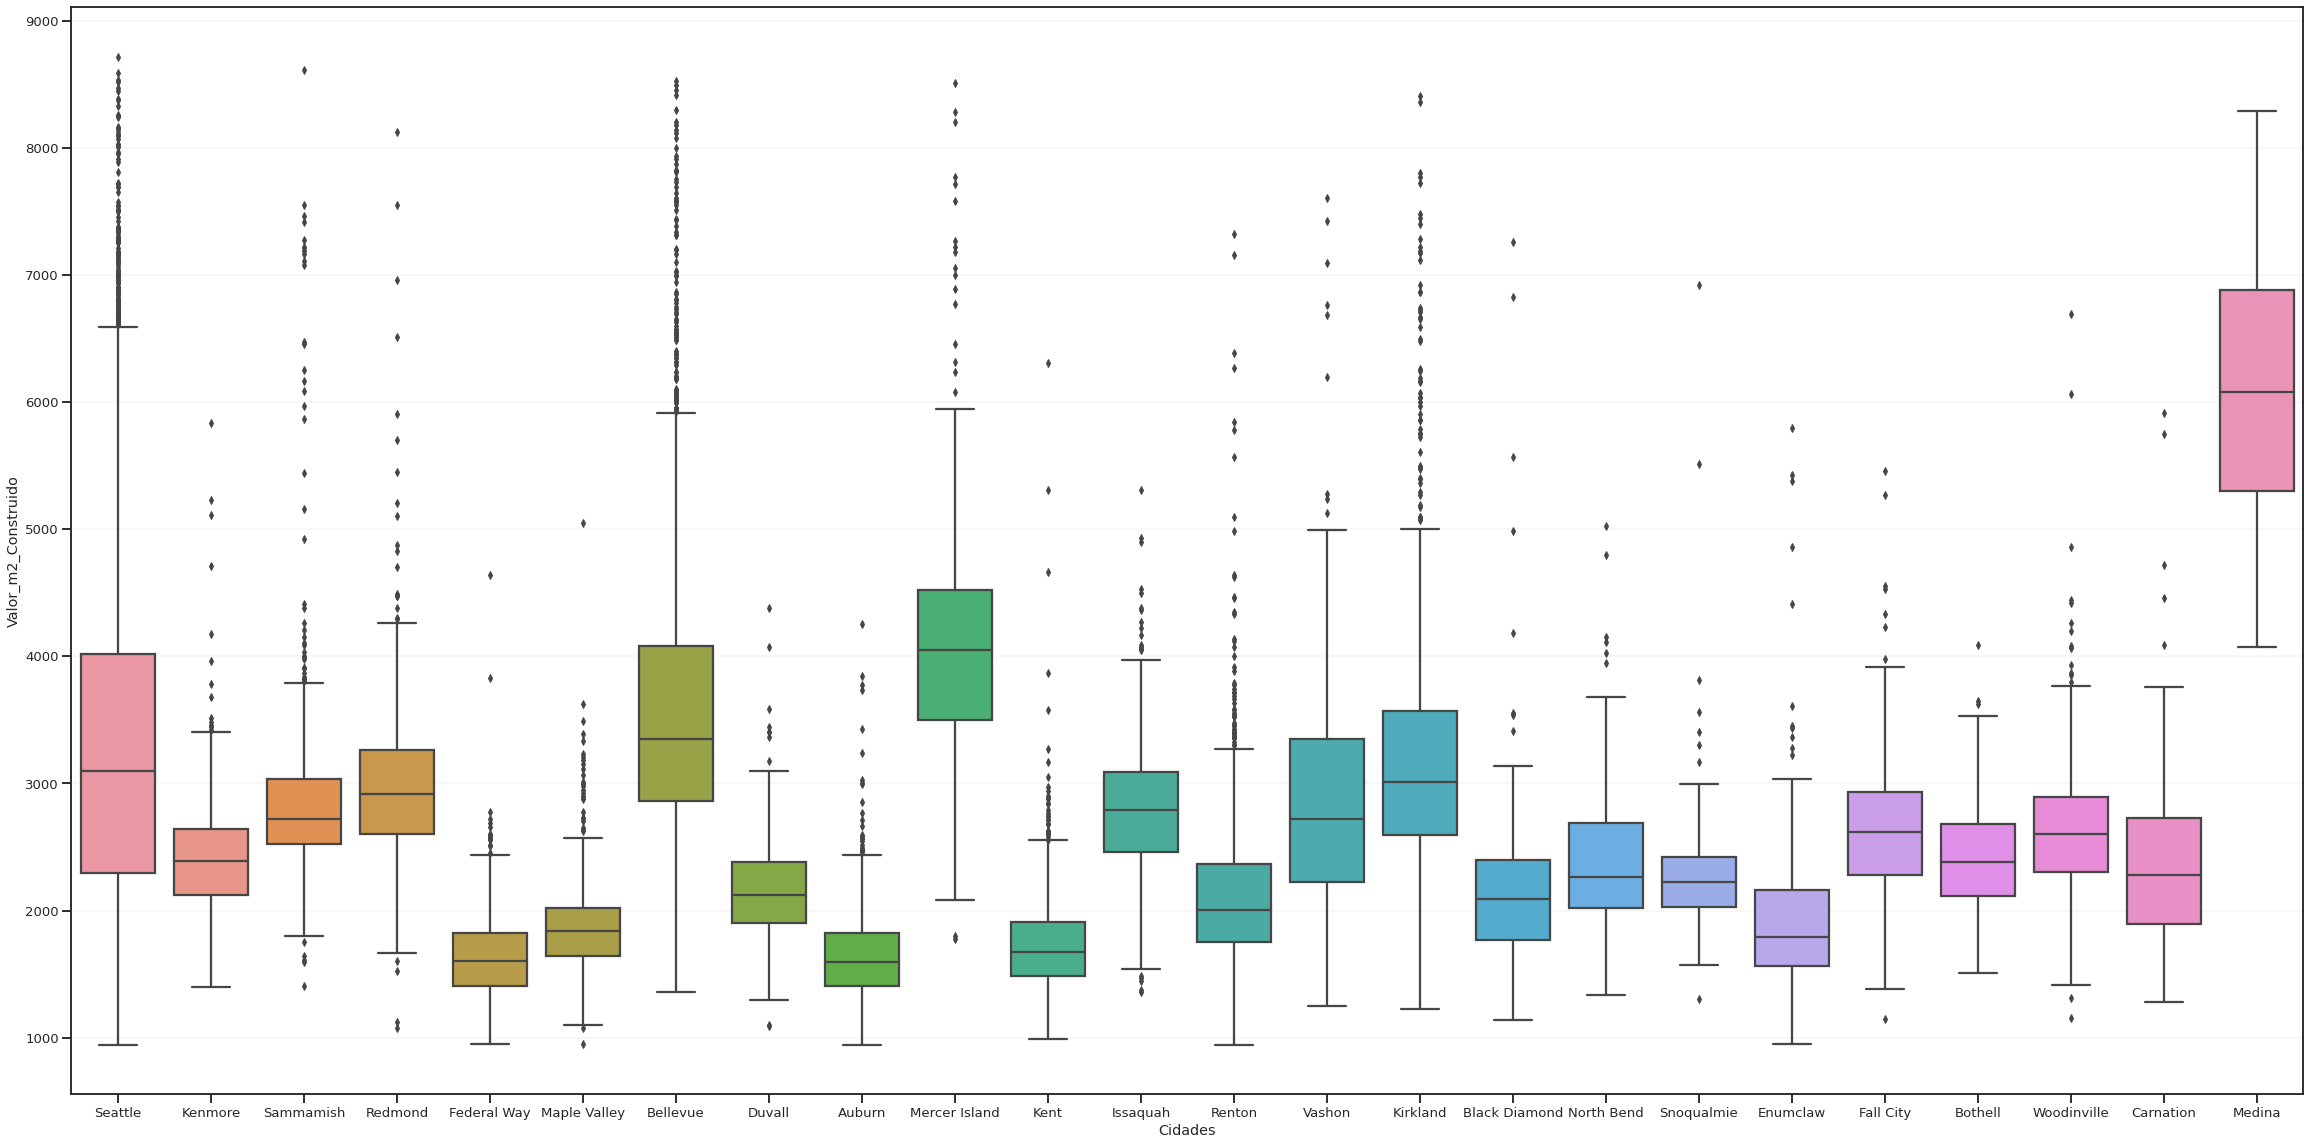

In [103]:
# Entendendo o valor do M2 para cada cidade

#Preço de M2 Area construída x Cidade

sns.boxplot(data=df,x='Cidades', y='Valor_m2_Construido');

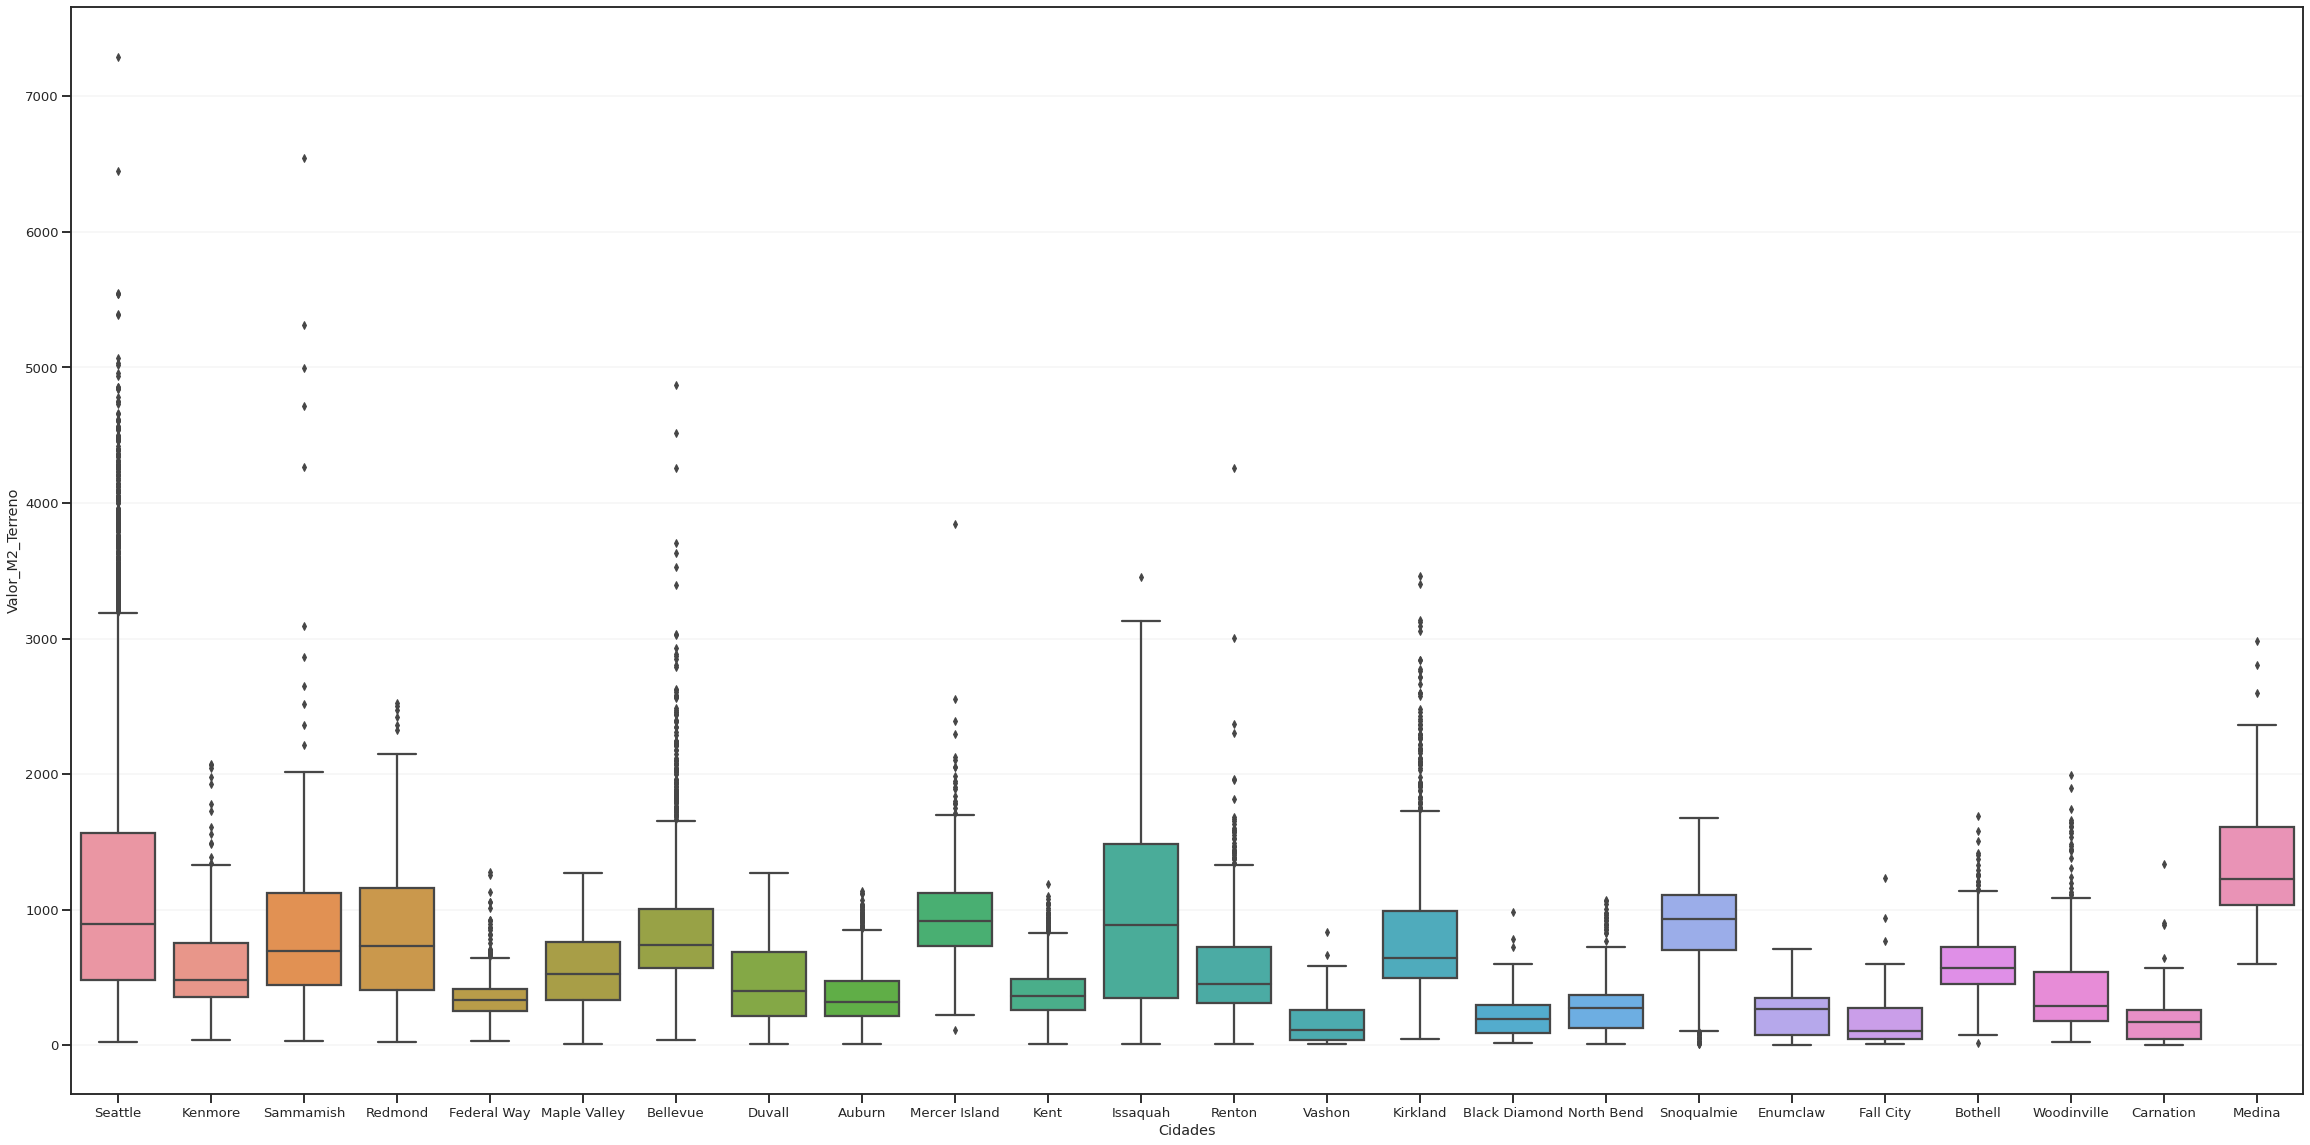

In [104]:
#Preço de M2 Area terreno x Cidade

sns.boxplot(data=df,x='Cidades', y='Valor_M2_Terreno');

## 4.2 Análisando a valorização dos imóveis ao longo dos anos


In [128]:
#Verificar a valorização dos imóveis

casas_revendidas = df[df.duplicated(subset=['id'], keep=False)].sort_values(['id'])


In [129]:
casas_revendidas

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Longitude,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno
2426,1000102,2014-09-16,280000.0,6,3.00,2.0,0,0,3,7,...,-122.214,Auburn,222.96720,870.779819,222.96720,0.00000,191.38018,679.678348,1255.790089,321.550860
2427,1000102,2015-04-22,300000.0,6,3.00,2.0,0,0,3,7,...,-122.214,Auburn,222.96720,870.779819,222.96720,0.00000,191.38018,679.678348,1345.489381,344.518779
16315,7200179,2014-10-16,150000.0,2,1.00,1.0,0,0,3,6,...,-122.211,Renton,78.03852,1184.513250,78.03852,0.00000,137.49644,647.441007,1922.127688,126.634295
16316,7200179,2015-04-24,175000.0,2,1.00,1.0,0,0,3,6,...,-122.211,Renton,78.03852,1184.513250,78.03852,0.00000,137.49644,647.441007,2242.482302,147.740011
11061,109200390,2014-08-20,245000.0,3,1.75,1.0,0,0,4,7,...,-122.367,Federal Way,137.49644,362.321700,137.49644,0.00000,170.01249,646.233268,1781.864316,676.194663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,9828200460,2014-06-27,260000.0,2,1.00,1.0,0,0,3,7,...,-122.300,Seattle,65.03210,445.934400,65.03210,0.00000,133.78032,445.934400,3998.025590,583.045399
14739,9834200305,2015-02-10,615000.0,3,1.00,1.5,0,0,5,7,...,-122.288,Seattle,166.29637,360.092028,101.26427,65.03210,126.34808,379.044240,3698.216624,1707.896738
14738,9834200305,2014-07-16,350000.0,3,1.00,1.5,0,0,5,7,...,-122.288,Seattle,166.29637,360.092028,101.26427,65.03210,126.34808,379.044240,2104.676127,971.973753
1050,9834200885,2014-07-17,360000.0,4,2.50,1.0,0,0,5,7,...,-122.290,Seattle,193.23824,379.044240,96.61912,96.61912,124.49002,379.044240,1862.985297,949.757210


In [131]:
grupo = casas_revendidas.groupby('id')

In [134]:
casas_revendidas['valorizacao'] = grupo['Preço'].pct_change()

In [136]:
casas_revendidas = casas_revendidas[~casas_revendidas['valorizacao'].isin([np.nan, np.inf, -np.inf])]

In [137]:
casas_revendidas

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno,valorizacao
2427,1000102,2015-04-22,300000.0,6,3.00,2.0,0,0,3,7,...,Auburn,222.96720,870.779819,222.96720,0.00000,191.38018,679.678348,1345.489381,344.518779,0.071429
16316,7200179,2015-04-24,175000.0,2,1.00,1.0,0,0,3,6,...,Renton,78.03852,1184.513250,78.03852,0.00000,137.49644,647.441007,2242.482302,147.740011,0.166667
11062,109200390,2014-10-20,250000.0,3,1.75,1.0,0,0,4,7,...,Federal Way,137.49644,362.321700,137.49644,0.00000,170.01249,646.233268,1818.228894,689.994555,0.020408
12028,123039336,2014-06-11,148000.0,1,1.00,1.0,0,0,3,5,...,Seattle,57.59986,767.471683,57.59986,0.00000,109.62554,765.892332,2569.450690,192.840991,-0.395672
7558,251300110,2015-01-14,358000.0,3,2.25,2.0,0,0,3,8,...,Federal Way,233.18653,1116.043739,233.18653,0.00000,173.72861,744.803351,1535.251629,320.775958,0.591111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,9407110710,2014-11-07,195000.0,3,1.75,1.0,0,0,2,7,...,North Bend,140.28353,780.385200,91.04494,49.23859,139.35450,940.642875,1390.042010,249.876599,-0.394410
4768,9809000020,2014-05-13,1895000.0,5,2.25,2.0,0,0,4,9,...,Bellevue,289.85736,1548.878816,289.85736,0.00000,347.45722,1658.597259,6537.698404,1223.465632,-0.023196
6155,9828200460,2014-06-27,260000.0,2,1.00,1.0,0,0,3,7,...,Seattle,65.03210,445.934400,65.03210,0.00000,133.78032,445.934400,3998.025590,583.045399,-0.395349
14738,9834200305,2014-07-16,350000.0,3,1.00,1.5,0,0,5,7,...,Seattle,166.29637,360.092028,101.26427,65.03210,126.34808,379.044240,2104.676127,971.973753,-0.430894


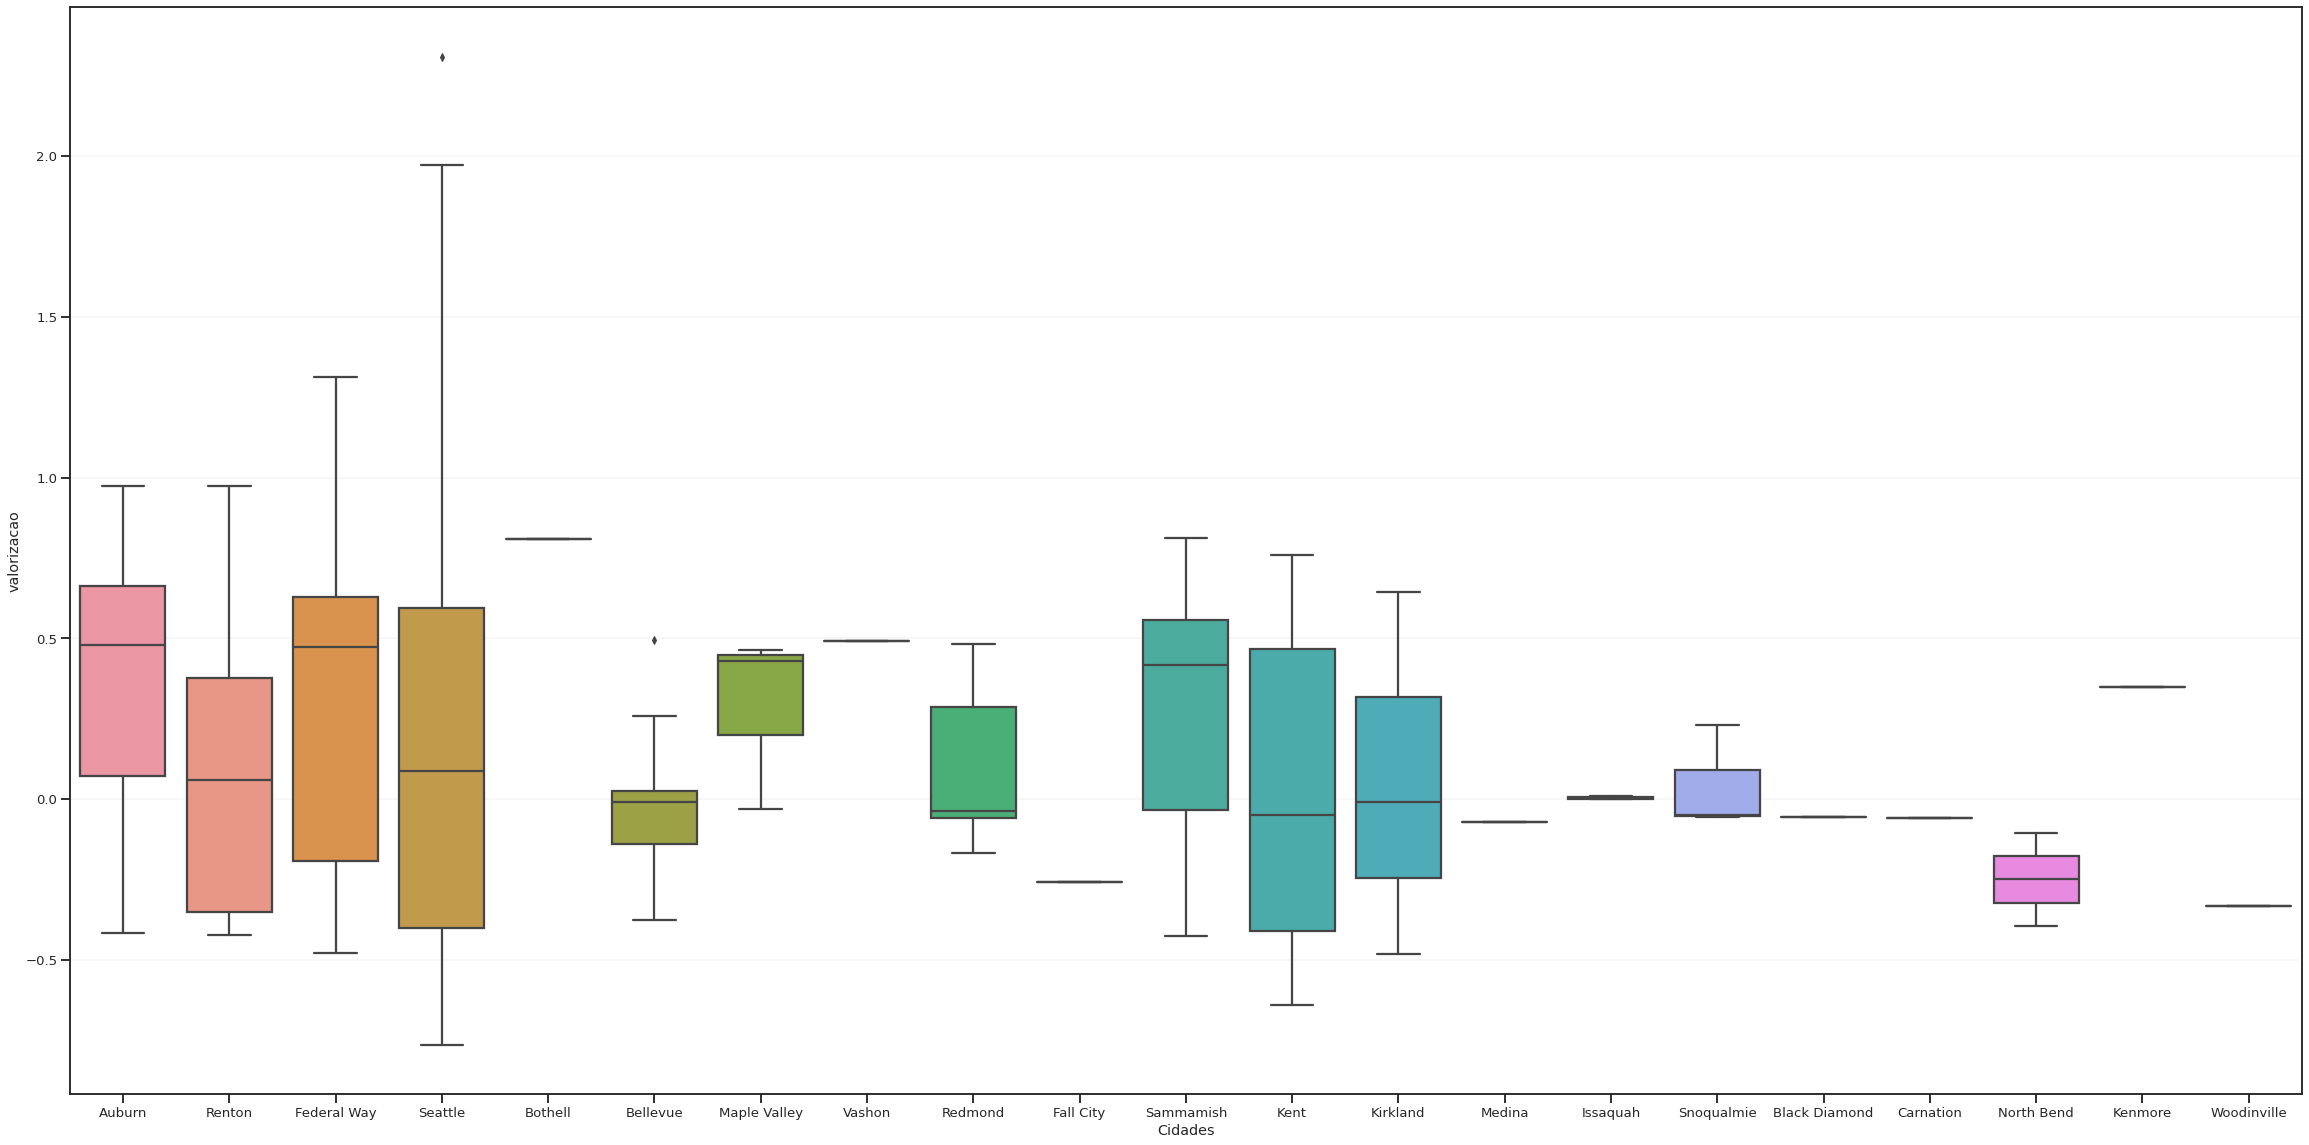

In [138]:
#Entender quais as principais regiões que valorizaram

sns.boxplot(data=casas_revendidas,x='Cidades', y='valorizacao')

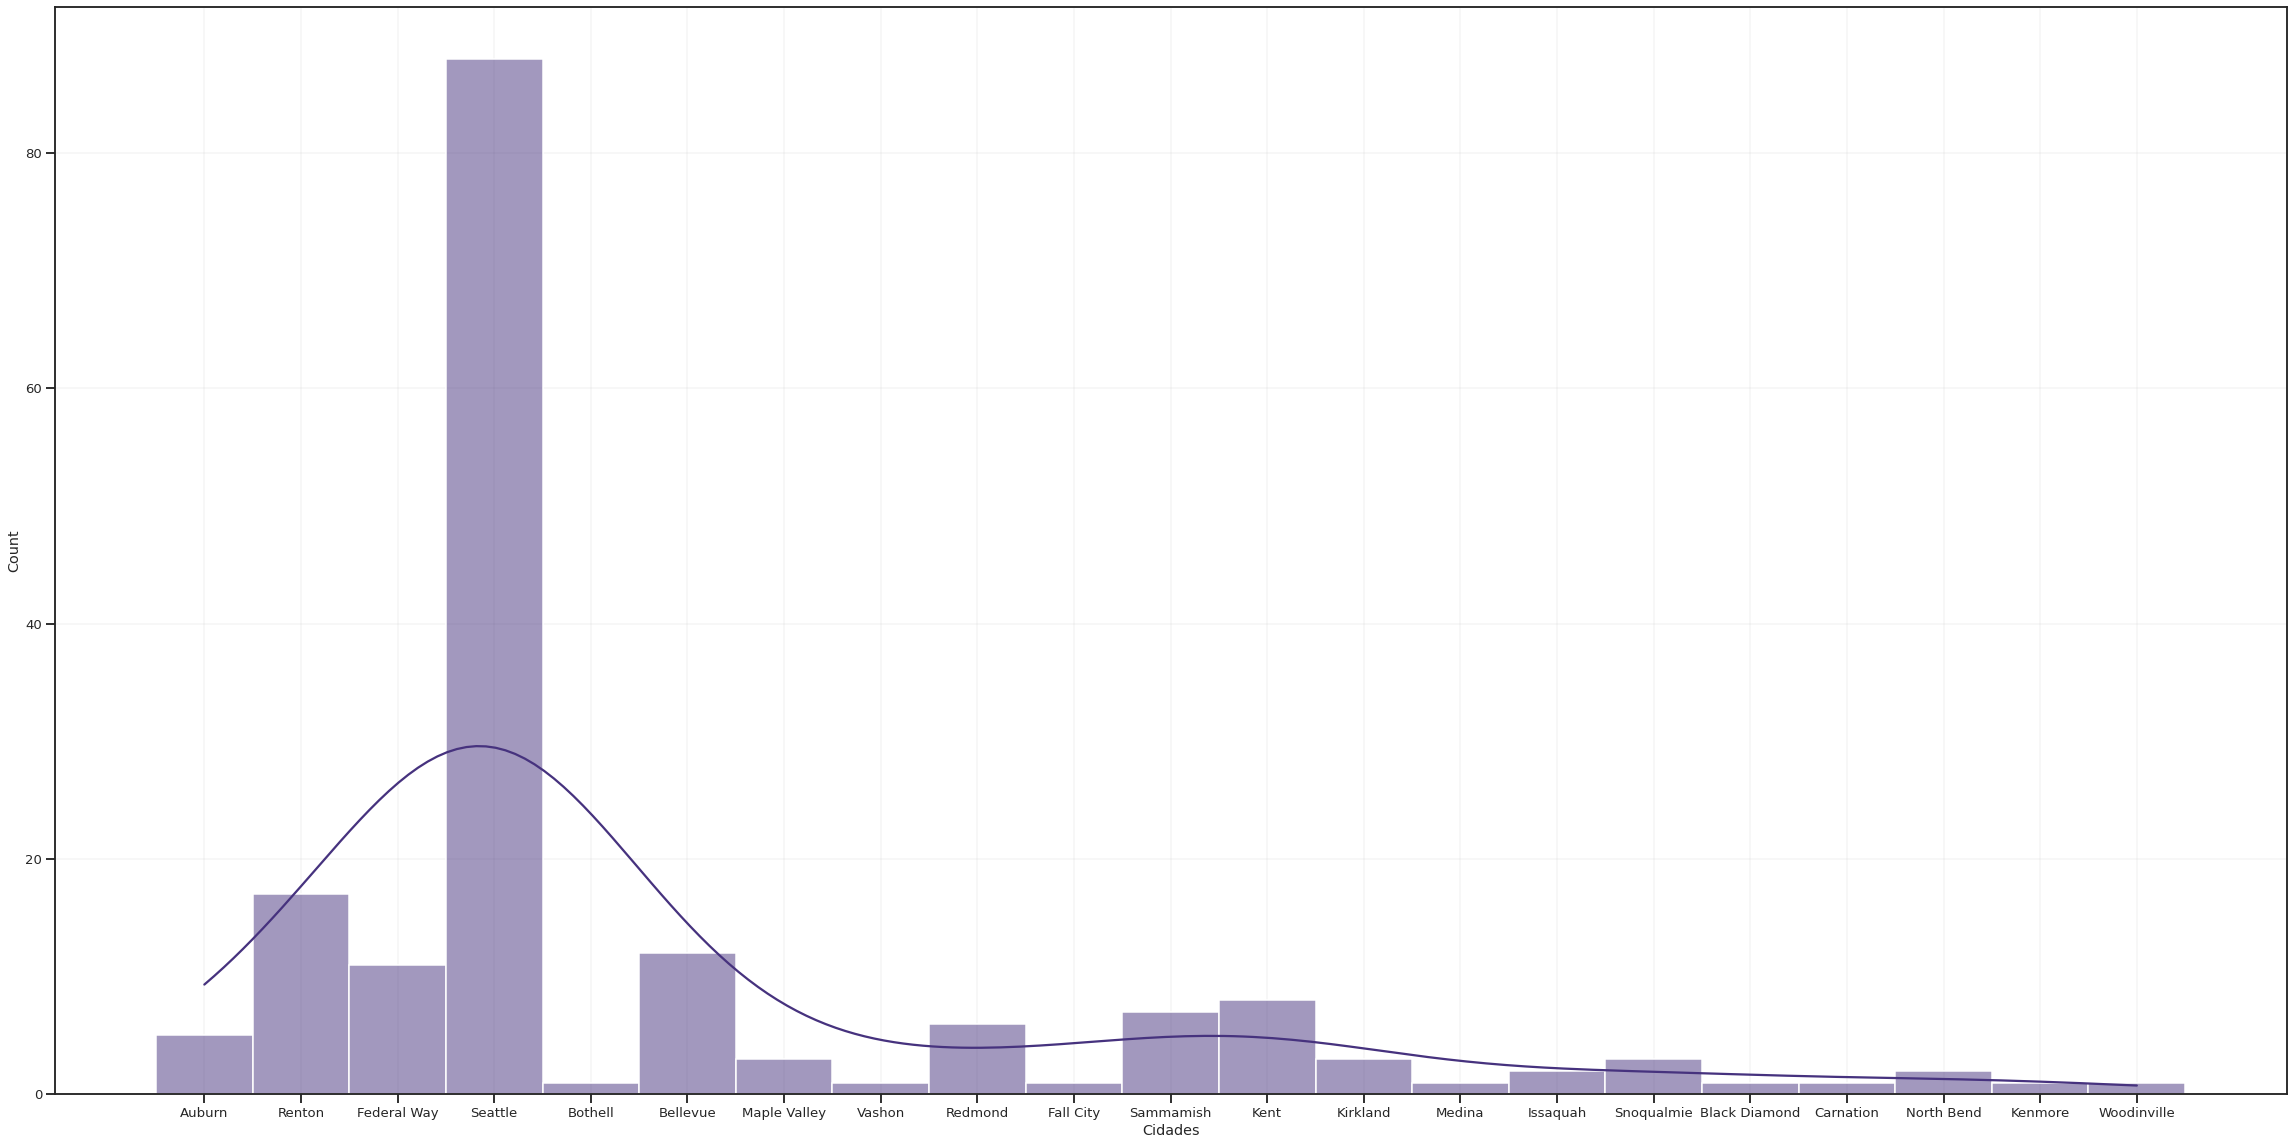

In [248]:
#Entendendo dos imóveis revendidos, qual região mais teve movimentação de venda.

sns.histplot(data=casas_revendidas,x='Cidades',kde=True);

Entendi que as cidades onde mais houve valorização foram:

- Auburn
- Federal Way
- Sammamish Cidades
- Maple Valley
- Seattle



Pelos gráficos é possível notar que as cidades de Auburn, Federal Way, e Maple Valley possuem uma boa valorização, além de uma média de preço mais baixa com relação as outras cidades, tendo uma potência de ser um ótimo custo-benifício para se investir. Além disso Seattle apresentou um grande volume de negociações na análise de valorização, isso significa que é uma cidade com alta procura. Por esse motivo essas 4 cidades serão selecionadas nas premissas.

## 4.3 Entendendo a relação do Preço com a Beleza da Vista.

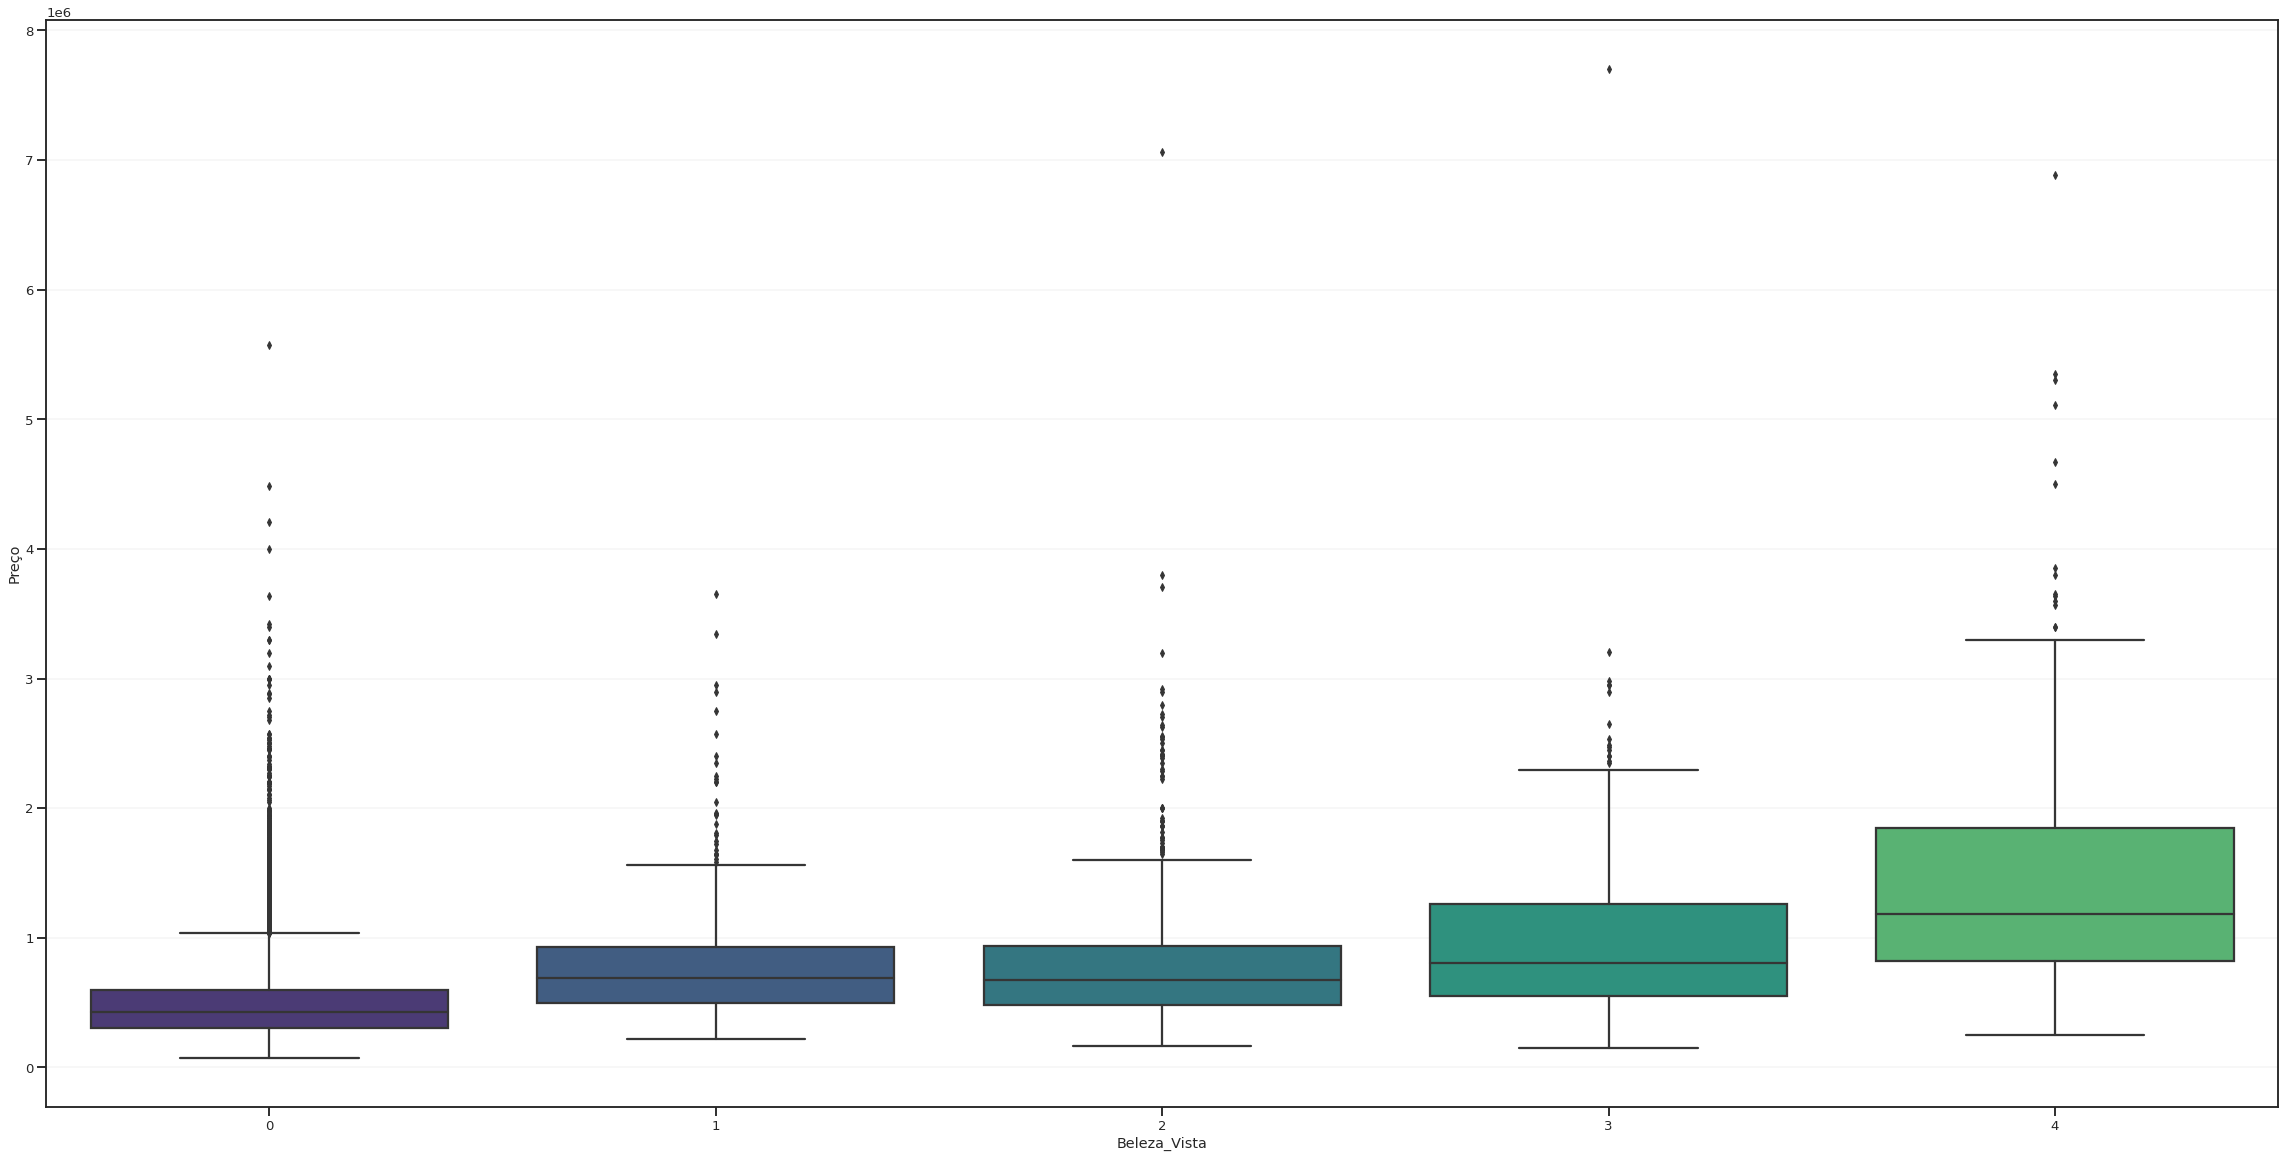

In [142]:
#Entendendo a relação do preço com a beleza da vista

sns.boxplot(data=df,x='Beleza_Vista', y='Preço');

É possível entender que nesse caso a beleza da vista 3 ( o que é considerado uma boa vista), influência um pouco no preço com relação a casas com vistas mais inferiores, porém tem uma variação consideravel sobre preços de casas com índice de beleza de vista 4. Sendo assim o grau de beleza de vista 3 será uma premissa.

## 4.4 Entendendo a relação do Preço com a Condição do imóvel.

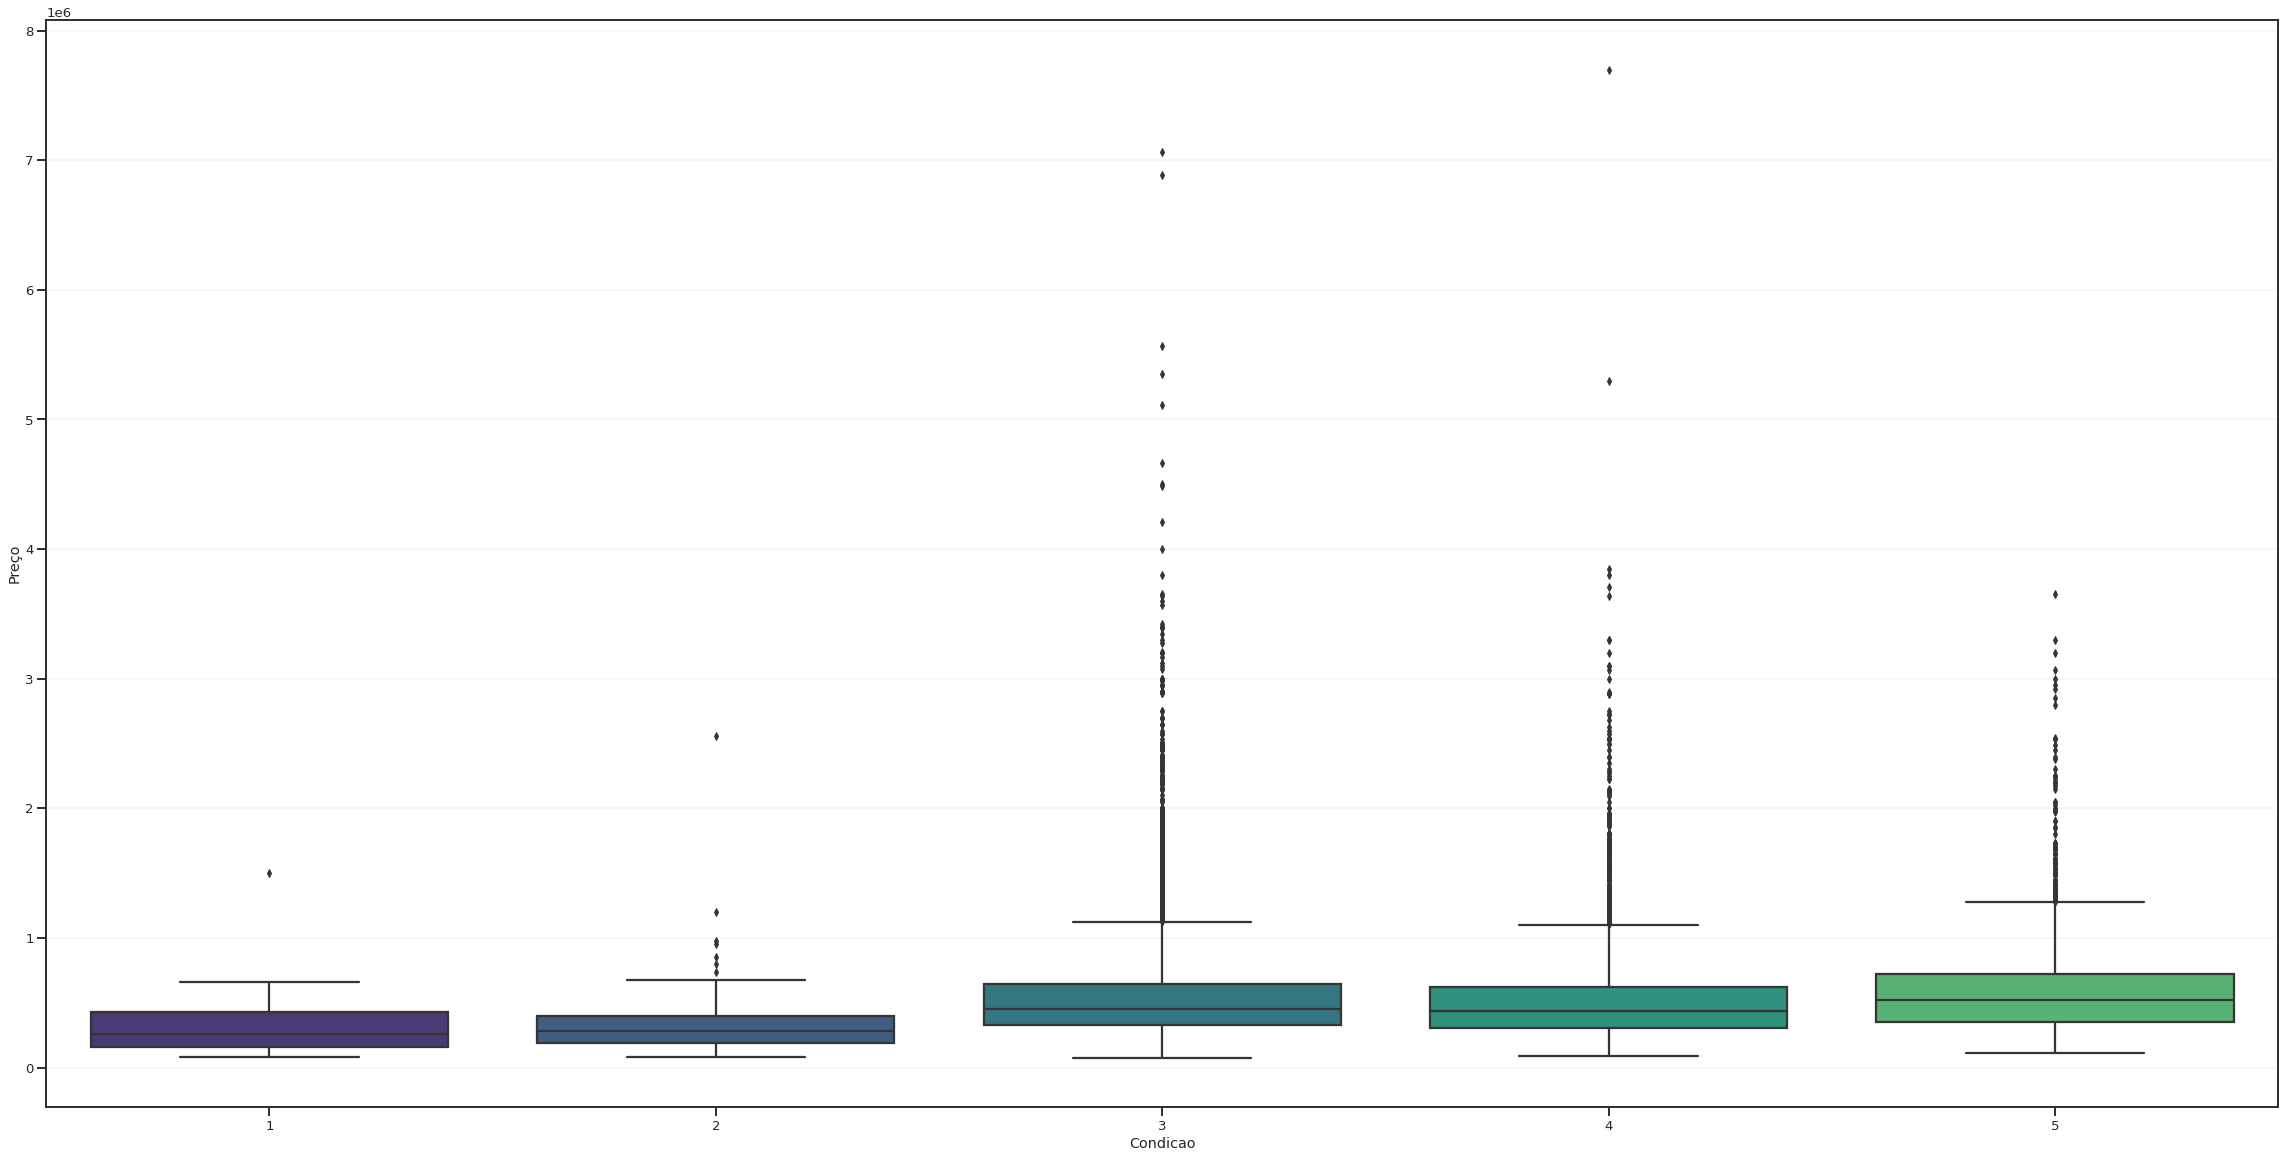

In [141]:
#Entendendo a relação do preço com a condição do imóvel

sns.boxplot(data=df,x='Condicao', y='Preço');

É possível entender que o grau da condição pouco impacta no valor da casa, pois quase todas medianas se encontram no mesmo ponto. Por esse motivo irá ser adotado como premissa a condição grau 5 (ótima condição).

## 4.5 Entendendo a relação do Preço com a Qualidade do Material.

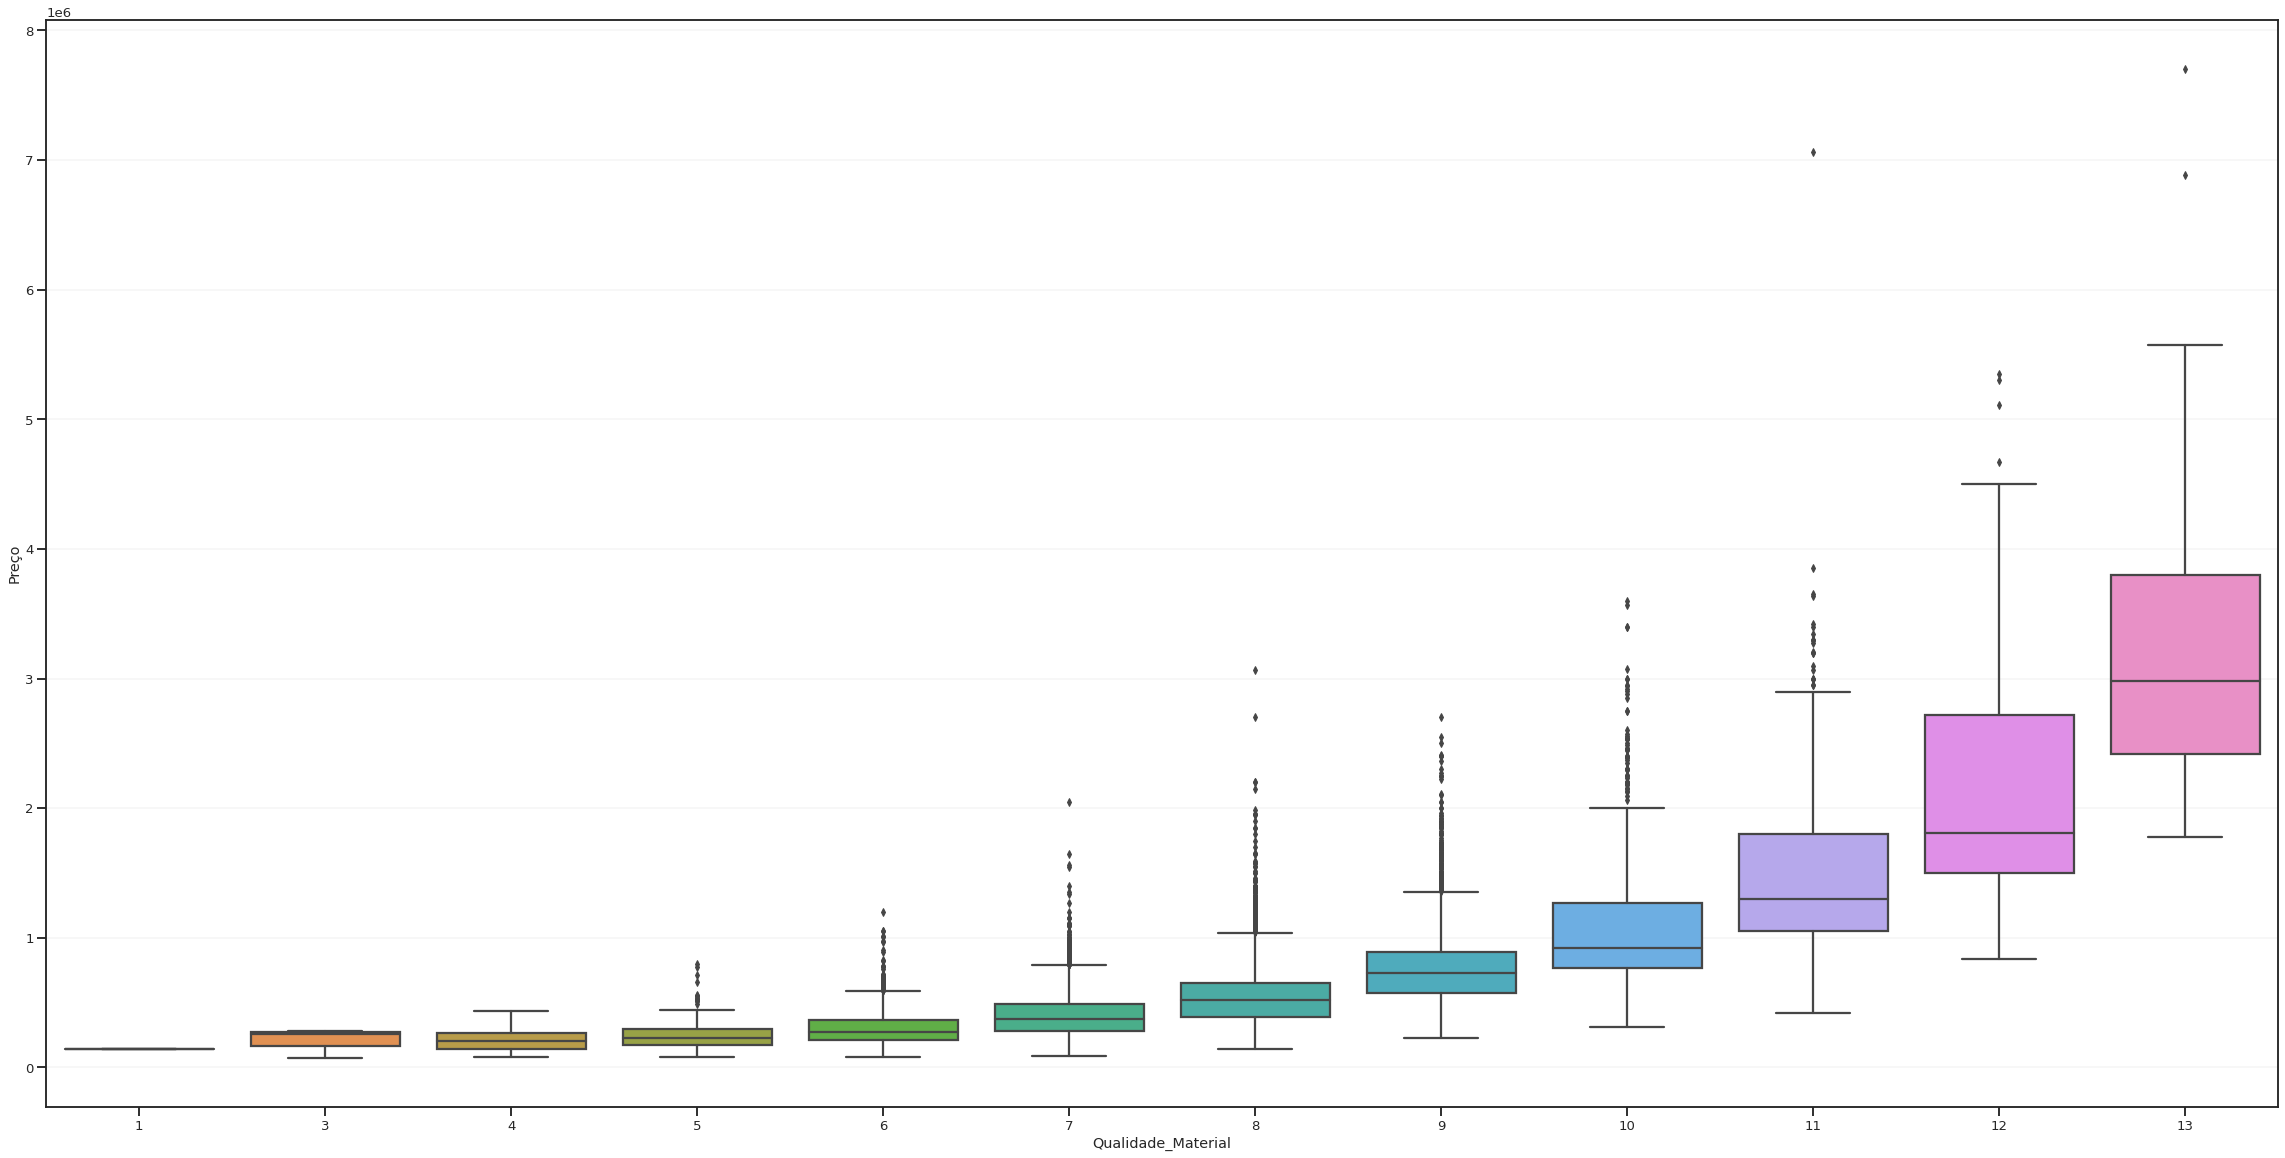

In [143]:
#Entendendo a relação do preço com a Qualidade do Material

sns.boxplot(data=df,x='Qualidade_Material', y='Preço');

Pela análise do gráfico é possível entender que a qualidade do material possui uma grande influência no preço do imóvel. Nesse caso acredito que o melhor caminho é compreender qual material traz um melhor custo benifício, e olhando para a mediana de cada um dos graus de qualidade de materiais, é possível observar que os materiais de grau 8 a 10 possuem uma boa relação qualidade do material x preço. Por isso será adotado como a próxima premissa.

## 4.6 Filtrando Premissas

Premissas:



1. Imóveis dentro das cidades de Auburn, Federal Way, Sammamish Cidades,Maple Valley, Seattle;
2. Beleza da vista grau 3;
3. Condição do imóvel grau 5;
4. Qualidade do Material entre 8 a 10;





In [ ]:
#filtrando segundo premissas

In [249]:
premissas_mateus = df[(df["Cidades"].isin(["Auburn",'Federal Way','Maple Valley','Seattle'])) & (df["Beleza_Vista"] ==3) & (df["Condicao"] == 5) & (df["Qualidade_Material"]>= 8)]



In [250]:
premissas_mateus

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Longitude,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno
286,9297300045,2014-07-09,550000.0,3,2.00,2.0,0,3,5,8,...,-122.375,Seattle,183.01891,387.033898,117.98681,65.03210,222.03817,387.033898,3005.153948,1421.064157
538,1373800295,2014-10-13,1450000.0,3,3.00,2.0,0,3,5,10,...,-122.411,Seattle,406.91514,587.146960,332.59274,74.32240,286.14124,713.495040,3563.396535,2469.569118
1625,5700003985,2014-10-29,2250000.0,4,3.50,2.0,0,3,5,10,...,-122.283,Seattle,412.48932,754.836875,291.71542,120.77390,370.68297,790.140015,5454.686681,2980.776476
5565,6613000585,2015-01-08,1620500.0,3,2.50,1.0,0,3,5,9,...,-122.270,Seattle,324.23147,869.757886,164.43831,159.79316,338.16692,689.804775,4997.972590,1863.162181
6318,1250204835,2014-09-08,1240000.0,4,3.00,1.5,0,3,5,9,...,-122.287,Seattle,309.36699,649.391970,216.46399,92.90300,243.40586,493.314930,4008.184584,1909.478493
6919,1024049024,2014-12-03,1735000.0,5,3.50,2.5,0,3,5,10,...,-122.290,Seattle,452.43761,715.353100,339.09595,113.34166,299.14766,715.353100,3834.782878,2425.375664
7381,4077800026,2014-05-30,715000.0,4,1.75,1.0,0,3,5,8,...,-122.277,Seattle,317.72826,668.901600,164.43831,153.28995,227.61235,575.998600,2250.350661,1068.916564
8521,5067400032,2014-12-05,550000.0,3,2.50,1.0,0,3,5,9,...,-122.321,Seattle,285.21221,1337.803200,159.79316,125.41905,187.66406,1691.856533,1928.388690,411.121755
8816,7129301001,2014-12-09,675000.0,4,2.75,2.0,0,3,5,8,...,-122.256,Seattle,248.05101,629.882340,151.43189,96.61912,222.96720,556.396067,2721.214479,1071.628711
9250,868001790,2015-03-16,1300000.0,3,1.00,1.0,0,3,5,8,...,-122.385,Seattle,189.52212,737.278208,156.07704,33.44508,213.67690,936.462240,6859.357631,1763.242133


In [251]:
premissas_mateus = premissas_mateus[premissas_mateus['Idade_Imovel'] > premissas_mateus['Idade_Imovel'].mean()]

In [252]:
premissas_mateus

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Longitude,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno
538,1373800295,2014-10-13,1450000.0,3,3.00,2.0,0,3,5,10,...,-122.411,Seattle,406.91514,587.146960,332.59274,74.32240,286.14124,713.495040,3563.396535,2469.569118
5565,6613000585,2015-01-08,1620500.0,3,2.50,1.0,0,3,5,9,...,-122.270,Seattle,324.23147,869.757886,164.43831,159.79316,338.16692,689.804775,4997.972590,1863.162181
7381,4077800026,2014-05-30,715000.0,4,1.75,1.0,0,3,5,8,...,-122.277,Seattle,317.72826,668.901600,164.43831,153.28995,227.61235,575.998600,2250.350661,1068.916564
8521,5067400032,2014-12-05,550000.0,3,2.50,1.0,0,3,5,9,...,-122.321,Seattle,285.21221,1337.803200,159.79316,125.41905,187.66406,1691.856533,1928.388690,411.121755
10049,579002220,2014-08-27,808000.0,3,2.50,1.0,0,3,5,8,...,-122.387,Seattle,236.90265,579.714720,162.58025,74.32240,202.52854,483.095600,3410.683671,1393.789000
10422,269001331,2014-09-09,1308000.0,5,2.50,1.0,0,3,5,8,...,-122.390,Seattle,297.28960,730.496289,148.64480,148.64480,245.26392,713.495040,4399.750277,1790.563511
14590,8924600020,2014-11-14,1535000.0,4,4.50,1.0,0,3,5,9,...,-122.275,Seattle,536.05031,933.675150,293.57348,242.47683,274.06385,622.450100,2863.537193,1644.040757
15437,5135000050,2014-08-01,960000.0,4,2.50,1.0,0,3,5,9,...,-122.403,Seattle,261.98646,551.286402,164.43831,97.54815,207.17369,557.418000,3664.311507,1741.381606
16725,1338600225,2014-05-28,1970000.0,8,3.50,2.0,0,3,5,10,...,-122.303,Seattle,412.48932,602.011440,291.71542,120.77390,412.48932,802.681920,4775.881228,3272.363063
18067,2485000076,2015-01-22,1050000.0,4,3.25,1.0,0,3,5,10,...,-122.387,Seattle,341.88304,797.107740,170.94152,170.94152,250.83810,845.417300,3071.225762,1317.262331


### 4.6.1 Entendendo a influência do número de quartos no preço


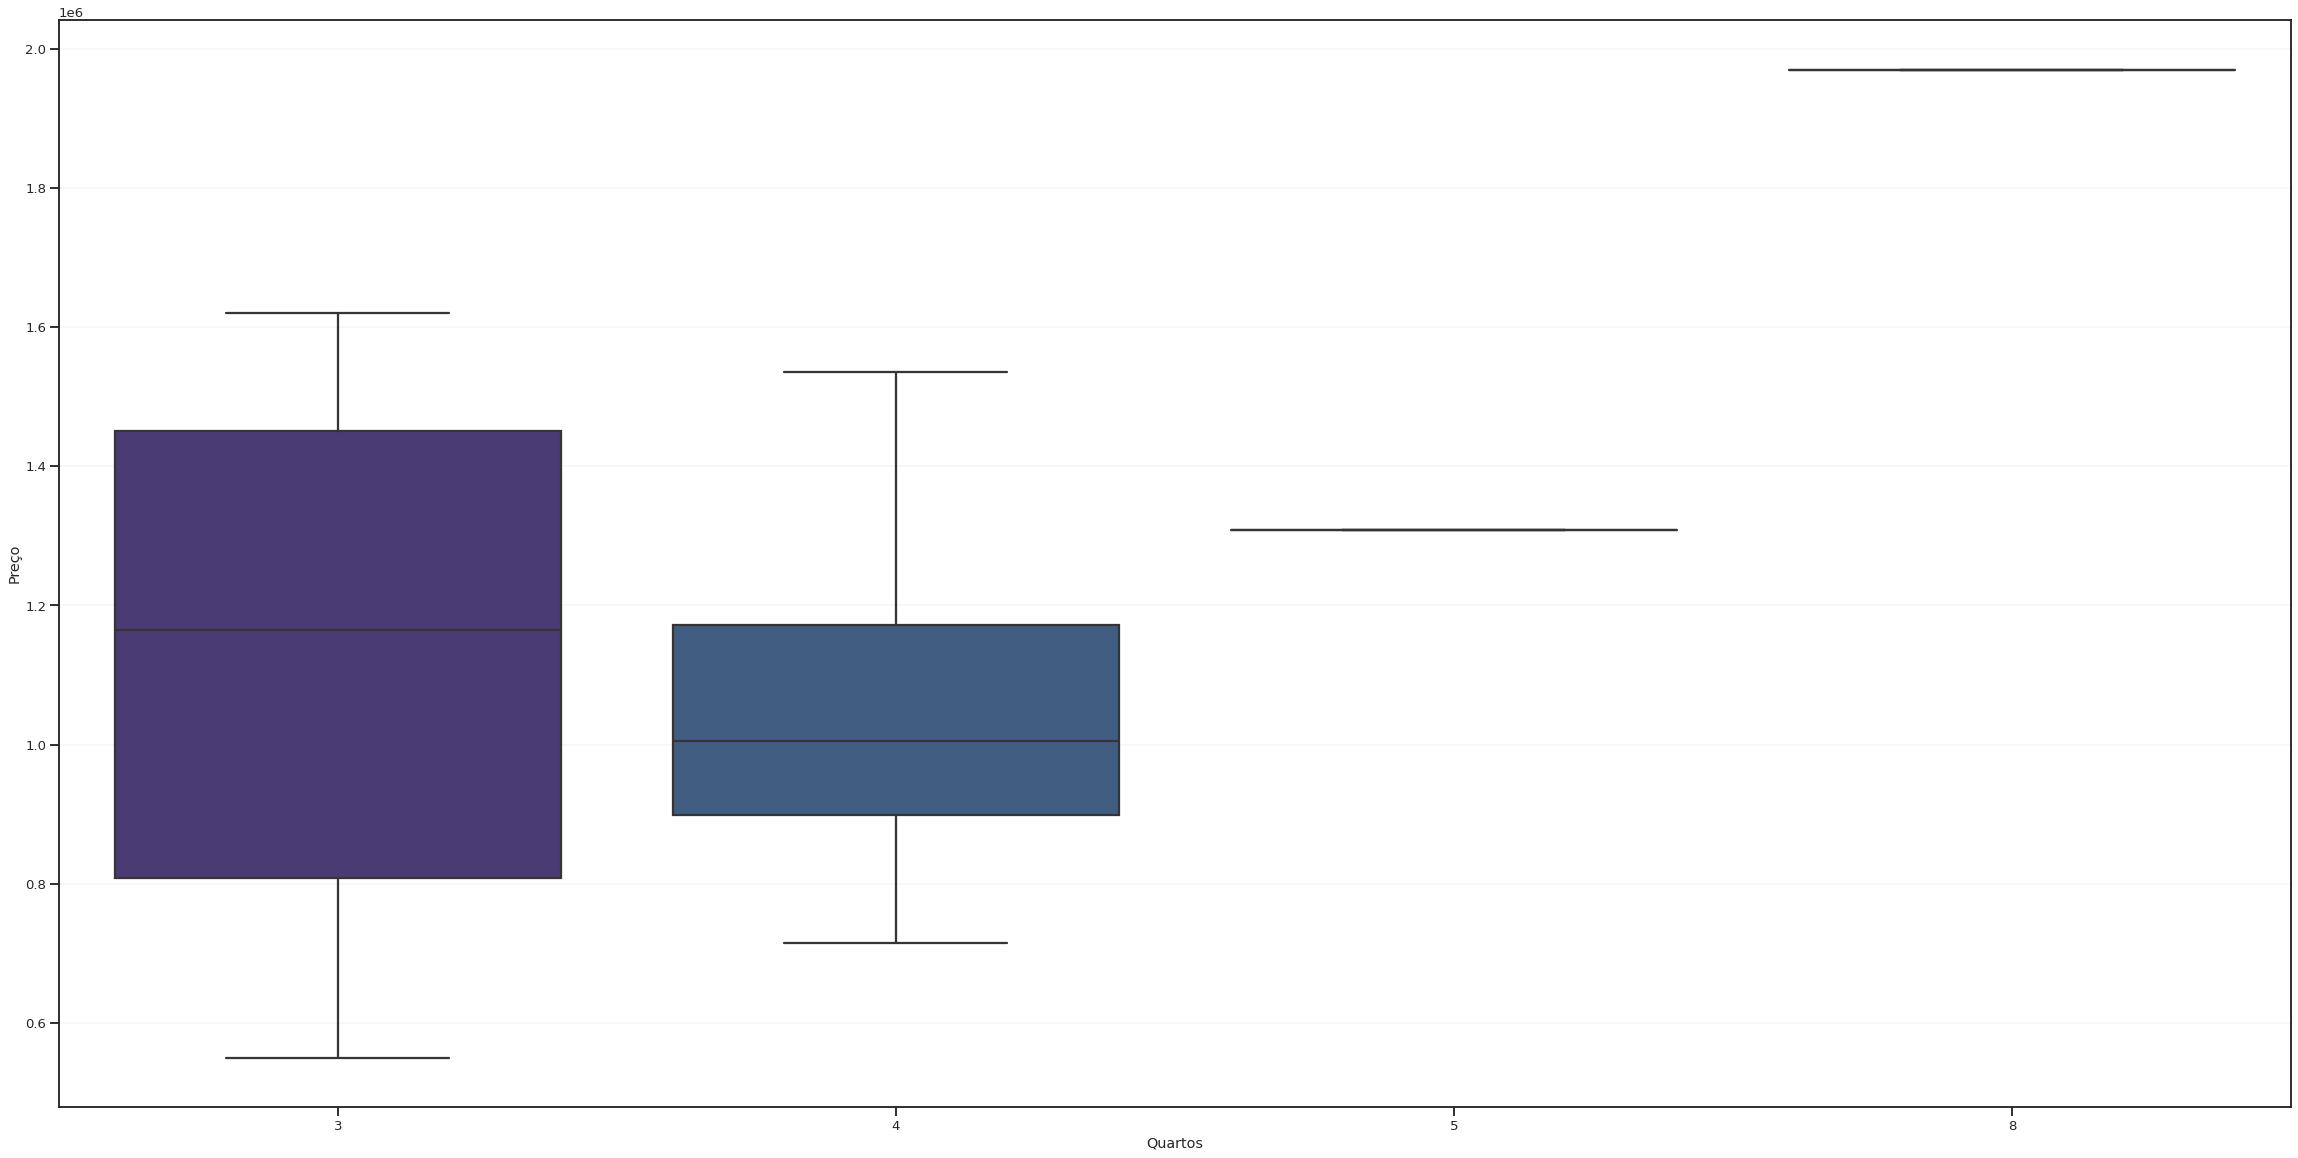

In [253]:
#Entendendo a influência do número de quartos no preço

sns.boxplot(data=premissas_mateus,x='Quartos', y='Preço');

### 4.6.2 Entendendo sobre os imóveis que tiveram uma valorização qual o número de quartos que mais tinham

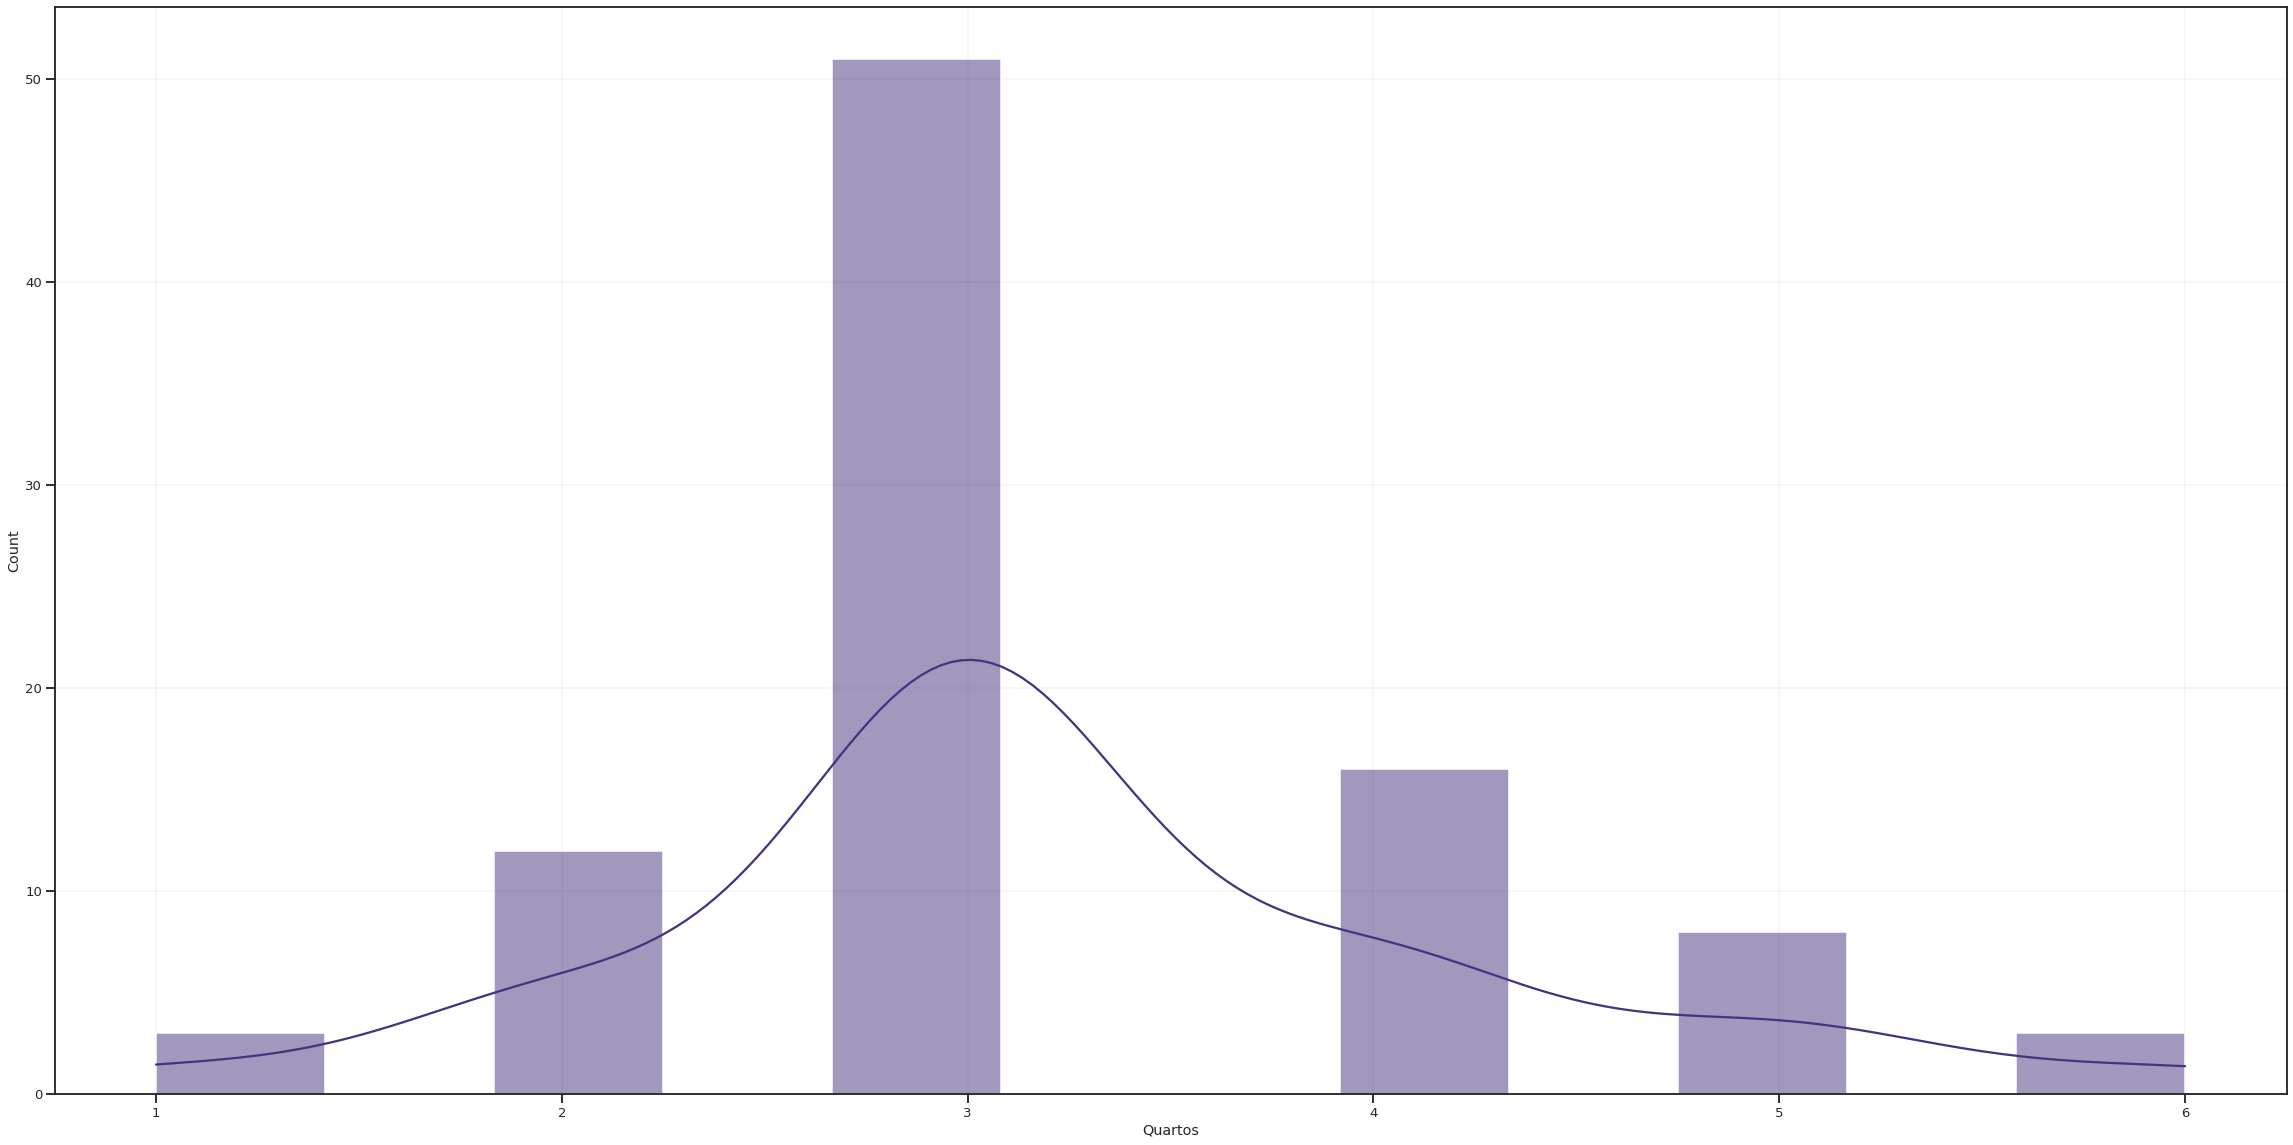

In [254]:
#Entendendo sobre os imóveis que tiveram uma valorização qual o número de quartos que mais tinham

casas_valorizadas = casas_revendidas[casas_revendidas['valorizacao']>0]

sns.histplot(data=casas_valorizadas,x='Quartos',kde=True);

Com essa análise é possível notar que casas com 3 quartos tem uma grande influência no preço e na valorização, por isso faz sentido adquirir imóveis com essa quantidade de quartos.

In [255]:
#Filtrando número de quartos

premissas_mateus = premissas_mateus[premissas_mateus['Quartos'] == 3]

In [256]:
imoveis_p_investir = premissas_mateus

# Etapa 5 - Buscando premissas para compreender quais imóveis que não devem ser investidos.

## 5.1 Entendendo quais imóveis sofreram desvalorização.

In [257]:
casas_revendidas_desv = casas_revendidas[casas_revendidas['valorizacao'] < 0]

casas_revendidas_desv

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno,valorizacao
12028,123039336,2014-06-11,148000.0,1,1.00,1.0,0,0,3,5,...,Seattle,57.59986,767.471683,57.59986,0.00000,109.62554,765.892332,2569.450690,192.840991,-0.395672
14404,324000530,2014-07-08,201500.0,3,1.00,1.5,0,0,3,7,...,Seattle,122.63196,464.515000,122.63196,0.00000,122.63196,388.241637,1643.127942,433.785777,-0.561002
14835,705730280,2014-08-19,325000.0,3,2.50,2.0,0,0,3,7,...,Maple Valley,161.65122,489.320101,161.65122,0.00000,202.52854,464.515000,2010.501375,664.186898,-0.029851
3678,723049156,2014-05-23,149000.0,3,1.00,1.0,0,0,3,6,...,Seattle,157.93510,803.146435,157.93510,0.00000,139.35450,741.365940,943.425496,185.520340,-0.476642
17087,795000620,2014-12-15,124000.0,3,1.00,1.0,0,0,2,5,...,Seattle,100.33524,580.643750,100.33524,0.00000,99.40621,580.643750,1235.856913,213.556075,-0.210191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16175,9250900104,2014-11-10,300000.0,5,1.75,1.0,0,0,3,7,...,Seattle,196.02533,789.675500,102.19330,93.83203,187.66406,789.675500,1530.414462,379.902884,-0.395161
2423,9407110710,2014-11-07,195000.0,3,1.75,1.0,0,0,2,7,...,North Bend,140.28353,780.385200,91.04494,49.23859,139.35450,940.642875,1390.042010,249.876599,-0.394410
4768,9809000020,2014-05-13,1895000.0,5,2.25,2.0,0,0,4,9,...,Bellevue,289.85736,1548.878816,289.85736,0.00000,347.45722,1658.597259,6537.698404,1223.465632,-0.023196
6155,9828200460,2014-06-27,260000.0,2,1.00,1.0,0,0,3,7,...,Seattle,65.03210,445.934400,65.03210,0.00000,133.78032,445.934400,3998.025590,583.045399,-0.395349


### 5.1.1 Entendendo o quanto a beleza da vista influência na desvalorização.

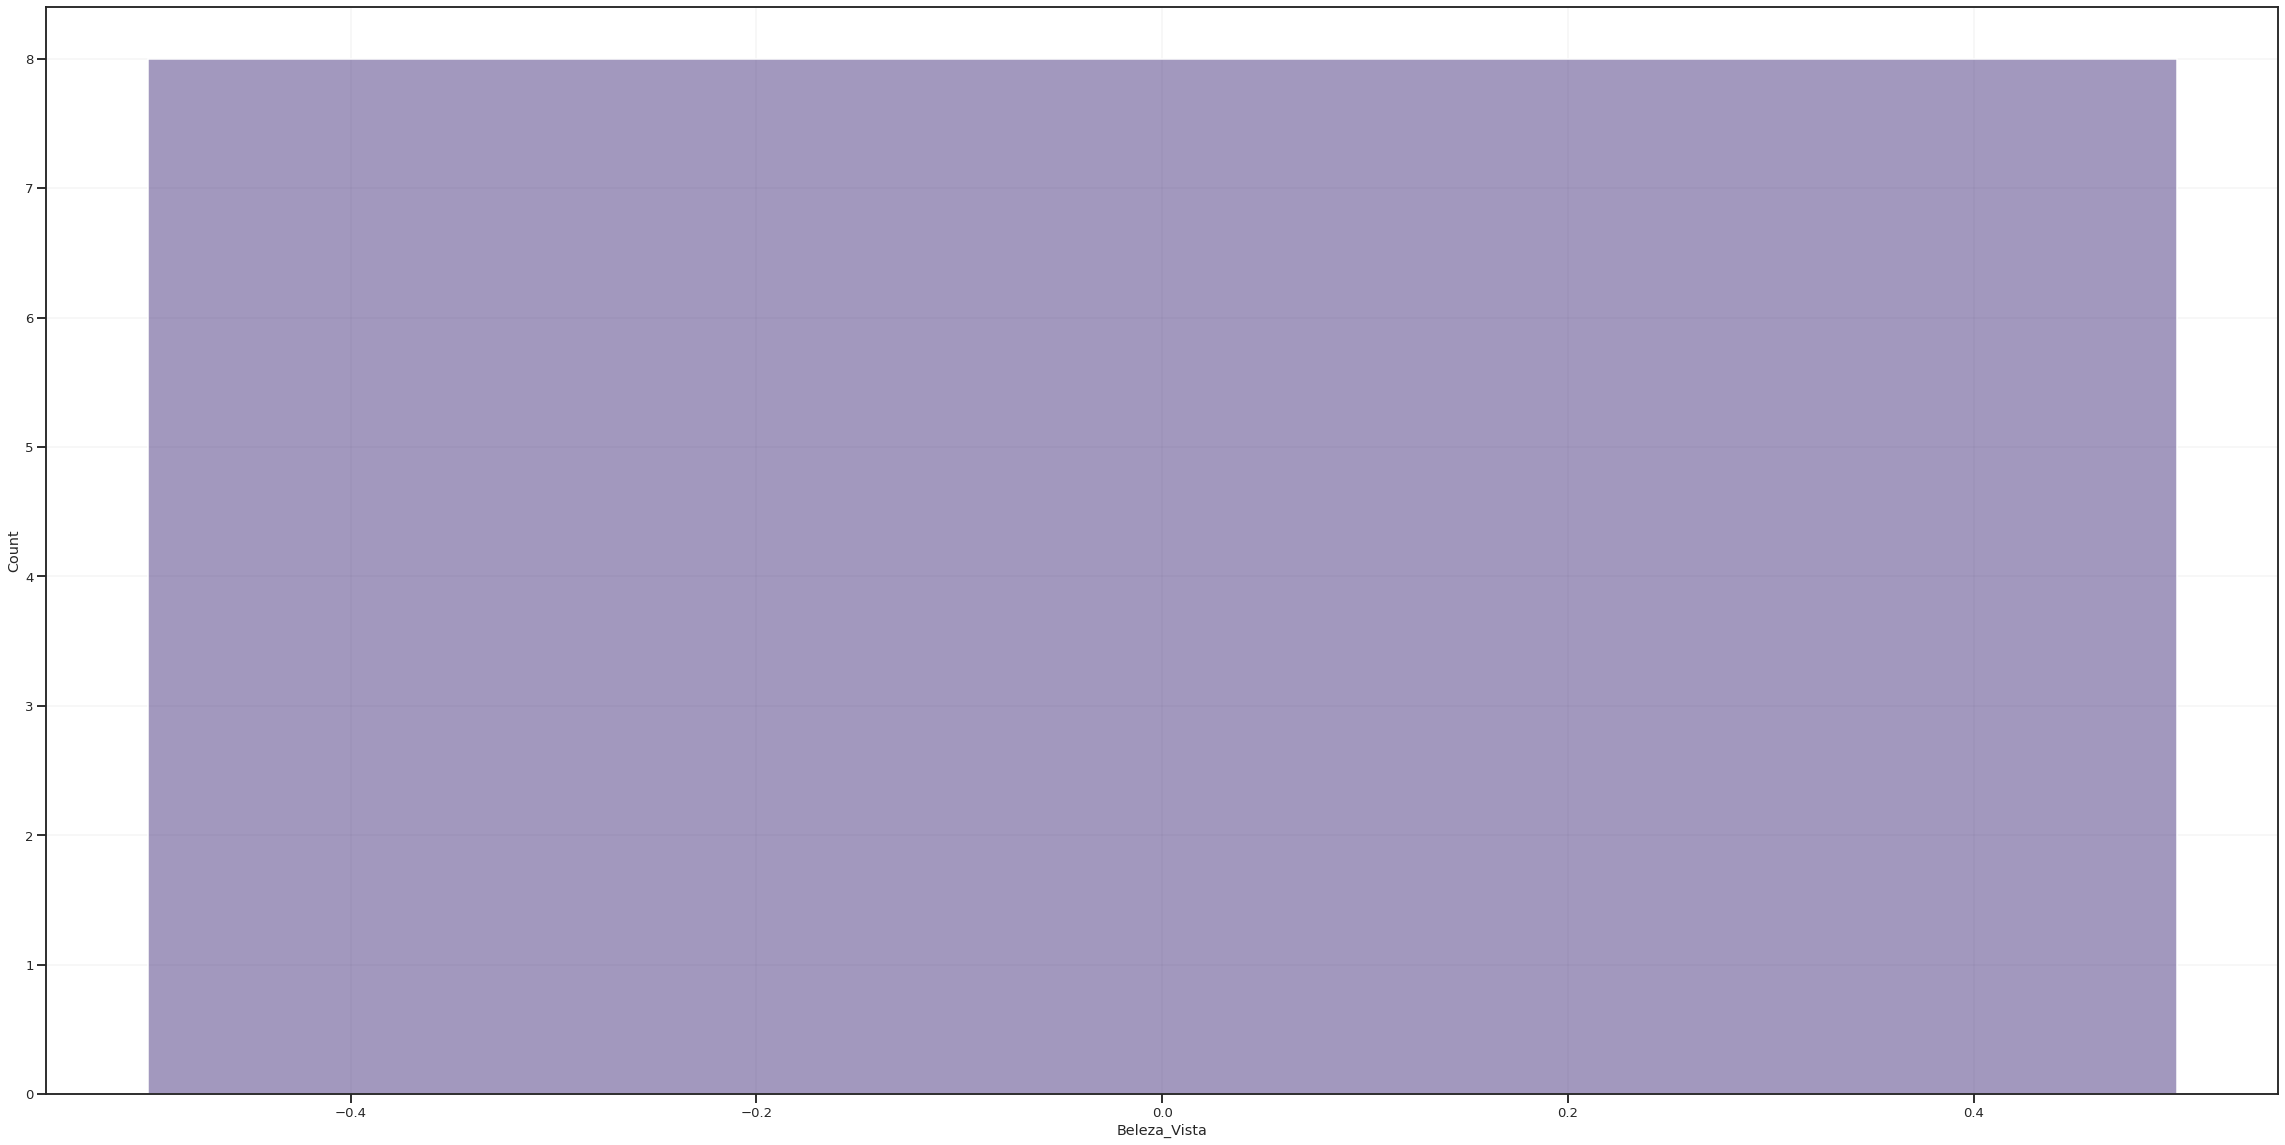

In [265]:
sns.histplot(data=casas_revendidas_desv,x='Beleza_Vista',kde=True);

## 5.2 Filtrando os imóveis que sofreram desvalorização e possuem um preço acima da mediana geral de preço de todos imóveis.

In [258]:
casas_revendidas_desv = casas_revendidas_desv[casas_revendidas_desv['Preço'] > df['Preço'].median()]

## 5.3 Filtrando os imóveis que sofreram desvalorização e possuem grau de condição menor do que 3.

In [259]:
casas_revendidas_desv = casas_revendidas_desv[casas_revendidas_desv['Condicao'] <= 3]

In [260]:
casas_revendidas_desv

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno,valorizacao
14815,2619920170,2014-12-19,765000.0,4,2.50,2.0,0,0,3,9,...,Kirkland,300.07669,398.553870,300.07669,0.00000,299.14766,472.225949,2549.348302,1919.439397,-0.009709
16697,4139440480,2014-06-26,695000.0,3,2.75,2.0,0,0,3,10,...,Bellevue,240.61877,1120.688889,240.61877,0.00000,264.77355,786.795507,2888.386471,620.154270,-0.127433
15529,5536100020,2014-12-15,987000.0,3,2.00,1.0,0,0,3,8,...,Bellevue,200.67048,1466.752564,200.67048,0.00000,209.96078,909.241661,4918.511183,672.915135,-0.170588
17327,6791200120,2014-09-23,480000.0,3,2.25,1.0,0,0,3,8,...,Sammamish,169.08346,1241.369886,113.34166,55.74180,190.45115,1393.545000,2838.834739,386.669602,-0.067961
12892,7167000040,2015-03-05,700000.0,4,3.00,2.0,0,0,3,10,...,Black Diamond,311.22505,18511.201459,311.22505,0.00000,311.22505,17084.582991,2249.176279,37.814941,-0.054054
19498,7853400250,2014-06-04,610000.0,4,3.50,2.0,0,0,3,9,...,Snoqualmie,270.34773,488.669780,270.34773,0.00000,270.34773,488.669780,2256.353327,1248.286726,-0.054264
20601,7853420110,2014-10-03,594866.0,3,3.00,2.0,0,0,3,9,...,Snoqualmie,258.27034,557.418000,258.27034,0.00000,264.77355,557.418000,2303.268738,1067.181182,-0.048214
6181,9222400605,2014-11-15,842500.0,5,4.00,1.5,0,0,3,7,...,Seattle,276.85094,418.063500,192.30921,84.54173,144.92868,392.515175,3043.153836,2015.244096,-0.008824


## 5.4 Entre os imóveis filtrados, quais possuem maior desvalorização?

In [261]:
imoveis_n_investir = casas_revendidas_desv.sort_values('valorizacao').head(5)

In [262]:
imoveis_n_investir

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno,valorizacao
15529,5536100020,2014-12-15,987000.0,3,2.00,1.0,0,0,3,8,...,Bellevue,200.67048,1466.752564,200.67048,0.0000,209.96078,909.241661,4918.511183,672.915135,-0.170588
16697,4139440480,2014-06-26,695000.0,3,2.75,2.0,0,0,3,10,...,Bellevue,240.61877,1120.688889,240.61877,0.0000,264.77355,786.795507,2888.386471,620.154270,-0.127433
17327,6791200120,2014-09-23,480000.0,3,2.25,1.0,0,0,3,8,...,Sammamish,169.08346,1241.369886,113.34166,55.7418,190.45115,1393.545000,2838.834739,386.669602,-0.067961
19498,7853400250,2014-06-04,610000.0,4,3.50,2.0,0,0,3,9,...,Snoqualmie,270.34773,488.669780,270.34773,0.0000,270.34773,488.669780,2256.353327,1248.286726,-0.054264
12892,7167000040,2015-03-05,700000.0,4,3.00,2.0,0,0,3,10,...,Black Diamond,311.22505,18511.201459,311.22505,0.0000,311.22505,17084.582991,2249.176279,37.814941,-0.054054


# Etapa Final - Respondendo Perguntas de negócios

##**Quais 5 imóveis que devem ser investidos? porquê?**

In [208]:
imoveis_p_investir

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Longitude,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno
538,1373800295,2014-10-13,1450000.0,3,3.0,2.0,0,3,5,10,...,-122.411,Seattle,406.91514,587.146960,332.59274,74.32240,286.14124,713.495040,3563.396535,2469.569118
5565,6613000585,2015-01-08,1620500.0,3,2.5,1.0,0,3,5,9,...,-122.270,Seattle,324.23147,869.757886,164.43831,159.79316,338.16692,689.804775,4997.972590,1863.162181
8521,5067400032,2014-12-05,550000.0,3,2.5,1.0,0,3,5,9,...,-122.321,Seattle,285.21221,1337.803200,159.79316,125.41905,187.66406,1691.856533,1928.388690,411.121755
10049,579002220,2014-08-27,808000.0,3,2.5,1.0,0,3,5,8,...,-122.387,Seattle,236.90265,579.714720,162.58025,74.32240,202.52854,483.095600,3410.683671,1393.789000
18156,669000210,2014-07-16,1165000.0,3,2.5,2.0,0,3,5,9,...,-122.292,Seattle,248.05101,464.515000,185.80600,62.24501,215.53496,464.515000,4696.614620,2507.992207


Segundo minhas análises os imóveis acima são os 5 melhores para se investir. Baseio minha análise nos seguintes pontos.



1.   Estão em Seattle, uma cidade que pertece as 5 cidades com maior valorização de imóveis, olhando para análise de valorizão com base no valor de revenda, do tópico 4.2. Além disso, Seattle é a cidade com maior volume de negóciações dentro do Dataframe, o que mostra uma facilidade em vender o imóvel.


2. Todos eles seguem as premissas de custo benificio, levando em consideração a Beleza da vista, a condição do imóvel, e a Qualidade do material. Onde foi optado pelos melhores graus de condição de todos esses items, sem ter uma grande elevação de preços.


3. De todos os imóveis escolhidos segundo a premissa, foram escolhidos imóveis acima da média de idade, para que se obtesse os mais novos possíveis.


4. Com base nas análises do tópico 4.6, foi possível entender que os imóveis com 3 quartos são os anúnciados com maior preço, e também estavam presente entre os imóveis que mais tiveram valorização na hora de vender. Isso foi adotado também como uma premissa de escolha, pois entende-se que imóveis com esse número de quartos tem uma grande procura e por isso são valorizados.


##**Quais 5 imóveis que não devem ser investidos? porquê?**

In [263]:
imoveis_n_investir

,id,Data,Preço,Quartos,Banheiros,Andares,Beira_Mar,Beleza_Vista,Condicao,Qualidade_Material,...,Cidades,Area_Construída_m2,Area_Terreno_m2,Area_solo_m2,Area_subsolo_m2,Media_Area_Construida_15_Imoveis_Vizinhos_m2,Media_Area_Terreno_15_Imoveis_Vizinhos_m2,Valor_m2_Construido,Valor_M2_Terreno,valorizacao
15529,5536100020,2014-12-15,987000.0,3,2.00,1.0,0,0,3,8,...,Bellevue,200.67048,1466.752564,200.67048,0.0000,209.96078,909.241661,4918.511183,672.915135,-0.170588
16697,4139440480,2014-06-26,695000.0,3,2.75,2.0,0,0,3,10,...,Bellevue,240.61877,1120.688889,240.61877,0.0000,264.77355,786.795507,2888.386471,620.154270,-0.127433
17327,6791200120,2014-09-23,480000.0,3,2.25,1.0,0,0,3,8,...,Sammamish,169.08346,1241.369886,113.34166,55.7418,190.45115,1393.545000,2838.834739,386.669602,-0.067961
19498,7853400250,2014-06-04,610000.0,4,3.50,2.0,0,0,3,9,...,Snoqualmie,270.34773,488.669780,270.34773,0.0000,270.34773,488.669780,2256.353327,1248.286726,-0.054264
12892,7167000040,2015-03-05,700000.0,4,3.00,2.0,0,0,3,10,...,Black Diamond,311.22505,18511.201459,311.22505,0.0000,311.22505,17084.582991,2249.176279,37.814941,-0.054054


Segundo minhas análises os imóveis acima não devem receber investimentos. Baseio minha análise nos seguintes pontos.

1. Todos eles sofreram desvalorização ao serem negociados mais de uma vez.

2. Possuem um preço acima da mediana do Preço de todos imóveis do DF, ou seja são imóveis com preço bem alto. (Análise disponível no tópico 5.2)

3. Todos possuem uma condição menor do que 3. Isso significa que além de serem imóveis caros, pode ser que precisem de algum tipo de reparo em breve (o que pode desvalorizar mais caso o imóvel demore para ser vendido).

4. Os imóveis presentes em  Snoqualmie e Black Diamond, estão em regiões onde não houve muitas negociações (segundo histograma disponível no tópico 4.2), isso aponta um possível desinteresse pela região, e por isso pode ser que demore a ser vendido.

5. Todos possuem uma Beleza da Vista em 0. Segundo o histograma plotado no tópico 5.1.1 todos os imóveis que sofreram desvalorização ao serem negociados possuem o mesmo grau de Beleeza da Vista, o que indica que é algo levado em consideração ao vender um imóvel por um valor menor do que comprado.